In [159]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu, ttest_ind
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from statistics import mean

In [2]:
df = pd.read_csv("Attrition.csv")

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(1470, 35)

In [8]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [9]:
for column in df.columns:
    if df[column].nunique()==1:
        print("Unique values for column", column,"=1")
    

Unique values for column EmployeeCount =1
Unique values for column Over18 =1
Unique values for column StandardHours =1


In [10]:
df.drop(columns=["StandardHours", "Over18", "EmployeeCount"], inplace=True)

In [11]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [12]:
df.shape

(1470, 32)

# Data Analysis

## Gender and Age 

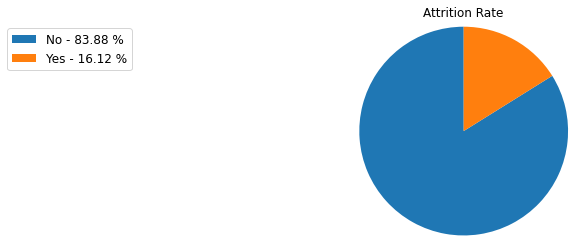

In [13]:
plt.title("Attrition Rate")
x = np.array(list(df["Attrition"].value_counts().index))
y = np.array(df["Attrition"].value_counts())
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

In [14]:
df.hvplot.hist(y="Age", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

**Erkek kadınlara göre ayrılmaya daha meyilli midir? <br>
Genç olan erkekler yaşı ilerlemiş erkeklere göre ayrılmaya daha meyilli midir?**

In [15]:
df.hvplot.scatter(
               x="Age",
               y="Gender",
               by="Attrition",
               width=800, height=400,
               size=50, alpha=0.5,
               xlabel="Age",
               ylabel="Gender",
               title="Yaş ve Cinsiyete Göre Ayrılma Durumu")

:NdOverlay   [Attrition]
   :Scatter   [Age]   (Gender)

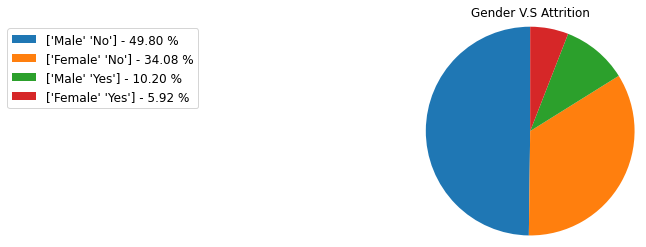

In [16]:
plt.title("Gender V.S Attrition")
x = np.array(list(df[['Gender', 'Attrition']].value_counts().index))
y = np.array(list(df[['Gender', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Business Travel

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

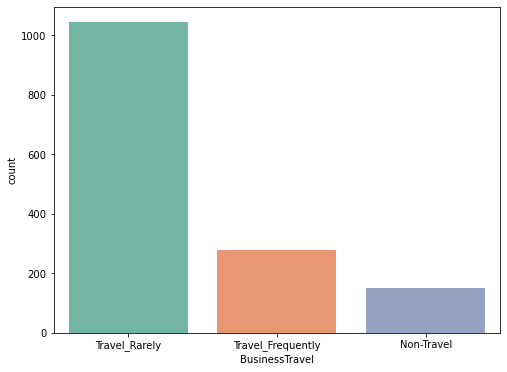

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(df['BusinessTravel'], palette='Set2')

**Sık sık seyahat eden çalışanlar diğer çalışanlara göre ayrılmaya daha meyilli midir?**

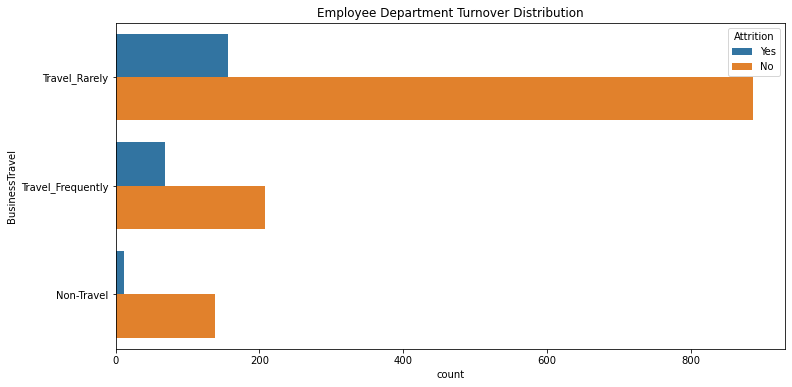

In [18]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="BusinessTravel", hue='Attrition', data=df).set_title('Employee Department Turnover Distribution');

## Daily Rate

In [19]:
df.hvplot.box(y='DailyRate', by='Attrition', height=400, width=400, legend=False, c='Green')

:BoxWhisker   [Attrition]   (DailyRate)

## Department

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

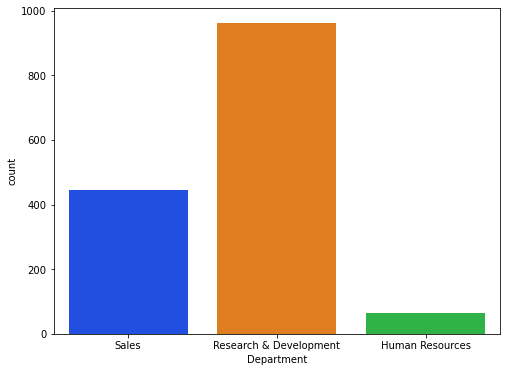

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['Department'], palette='bright')

Text(0.5, 1.0, 'Çalışan Departman ve Ayrılma Dağılımı')

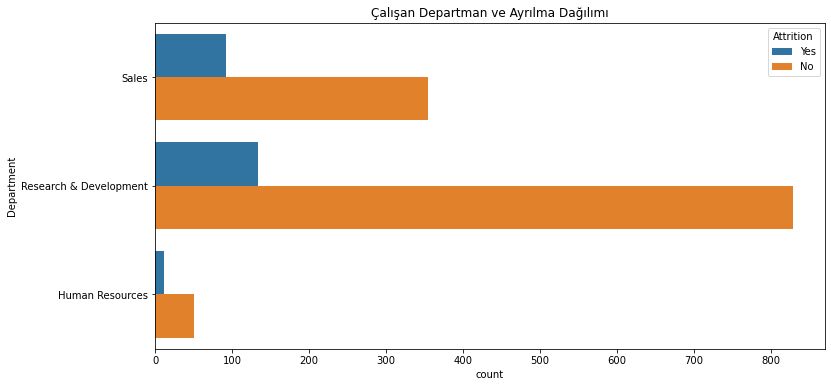

In [21]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="Department", hue='Attrition', data=df).set_title("Çalışan Departman ve Ayrılma Dağılımı")

## Distance From Home

**İşyerine uzaklığı fazla olan kişiler yakın olan kişilere göre ayrılmaya daha mı meyilli?**

In [22]:
df.hvplot.hist(y="DistanceFromHome", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

## Education Field

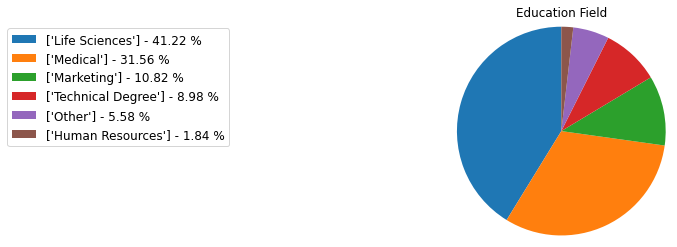

In [23]:
plt.title("Education Field")
x = np.array(list(df[['EducationField']].value_counts().index))
y = np.array(list(df[['EducationField']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan Eğitim Alanı ve Ayrılma Dağılımı')

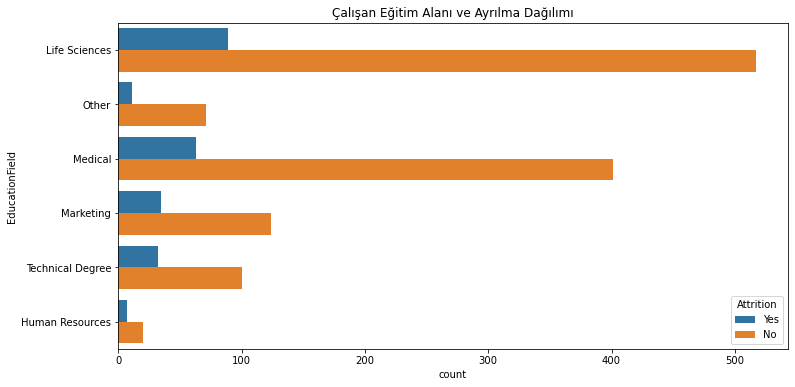

In [24]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="EducationField", hue='Attrition', data=df).set_title('Çalışan Eğitim Alanı ve Ayrılma Dağılımı')

## Environment Satisfaction

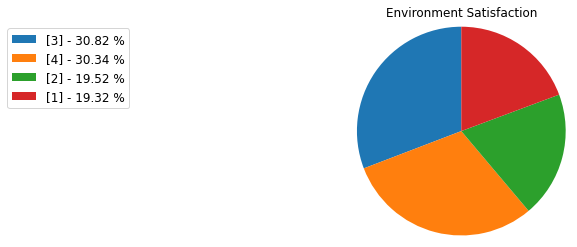

In [25]:
plt.title("Environment Satisfaction")
x = np.array(list(df[['EnvironmentSatisfaction']].value_counts().index))
y = np.array(list(df[['EnvironmentSatisfaction']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan Memnuniyet Seviyesi ve Ayrılma Dağılımı')

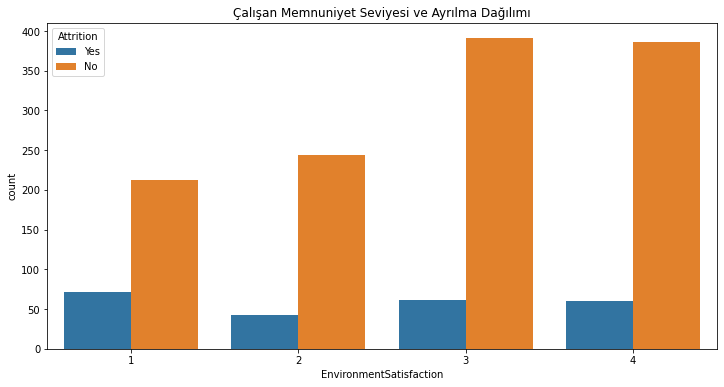

In [26]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="EnvironmentSatisfaction", hue='Attrition', data=df).set_title('Çalışan Memnuniyet Seviyesi ve Ayrılma Dağılımı')

## Job Involvement

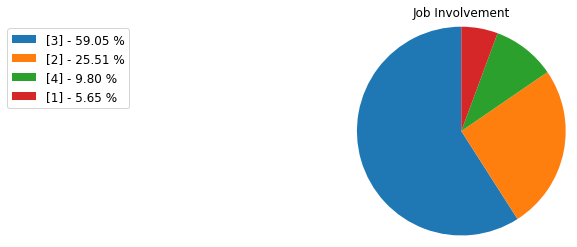

In [27]:
plt.title("Job Involvement")
x = np.array(list(df[['JobInvolvement']].value_counts().index))
y = np.array(list(df[['JobInvolvement']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

**İşe bağlılık seviyesi düşük olan çalışanlar ayrılmaya daha mı meyilli?**

Text(0.5, 1.0, 'Çalışan İşe Bağlılık Seviyesi ve Ayrılma Dağılımı')

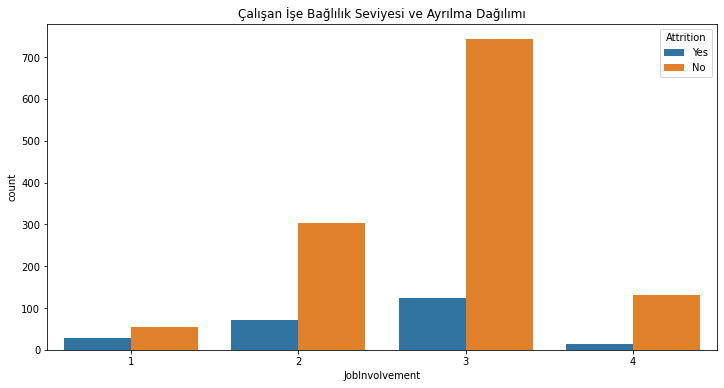

In [28]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="JobInvolvement", hue='Attrition', data=df).set_title('Çalışan İşe Bağlılık Seviyesi ve Ayrılma Dağılımı')

## Job Role

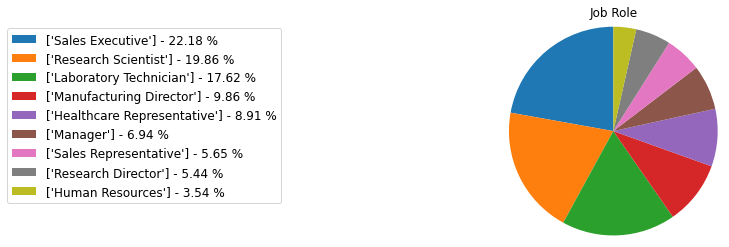

In [29]:
plt.title("Job Role")
x = np.array(list(df[['JobRole']].value_counts().index))
y = np.array(list(df[['JobRole']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan İş Rolü ve Ayrılma Dağılımı')

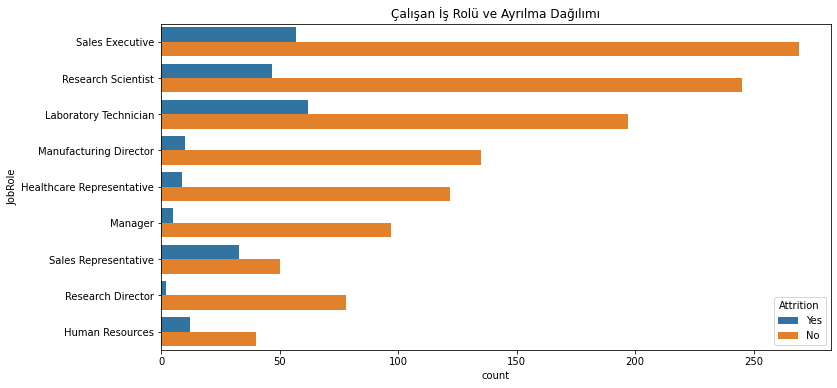

In [30]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="JobRole", hue='Attrition', data=df).set_title('Çalışan İş Rolü ve Ayrılma Dağılımı')

## Job Satisfaction

In [31]:
df.hvplot.hist(y="JobSatisfaction", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

## MaritalStatus

**Bekar kişiler diğerlerine göre ayrılmaya daha mı meyilli?**

Text(0.5, 1.0, 'Çalışan Evlilik Durumu ve Ayrılma Dağılımı')

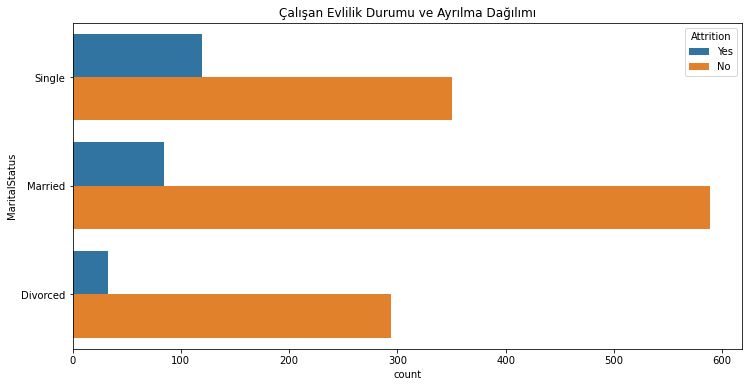

In [32]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="MaritalStatus", hue='Attrition', data=df).set_title('Çalışan Evlilik Durumu ve Ayrılma Dağılımı')

## Monthly Income

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

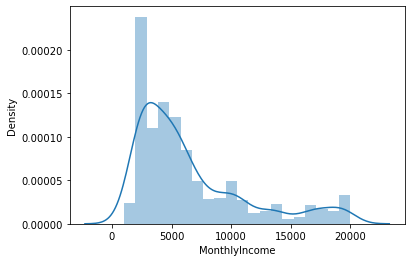

In [33]:
sns.distplot(df['MonthlyIncome'])

**Aylık maaşı az olan kişiler  fazla olan kişilere göre ayrılmaya daha mı meyilli?**

In [34]:
df.hvplot.scatter(
               x="MonthlyIncome",
               y="Gender",
               by="Attrition",
               width=800, height=400,
               size=50, alpha=0.5,
               xlabel="Age",
               ylabel="Gender",
               title="Aylık Gelir ve Cinsiyete Göre Ayrılma Durumu")

:NdOverlay   [Attrition]
   :Scatter   [MonthlyIncome]   (Gender)

## Number of Companies Worked

In [35]:
df.hvplot.hist(y="NumCompaniesWorked", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

## OverTime

**Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha mı meyilli?**

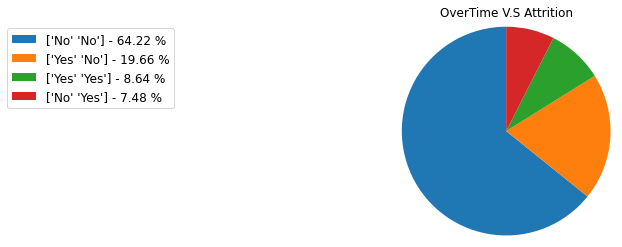

In [36]:
plt.title("OverTime V.S Attrition")
x = np.array(list(df[['OverTime', 'Attrition']].value_counts().index))
y = np.array(list(df[['OverTime', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Percent Salary Hike

**Maaşına az zam alan kişiler fazla zam alan kişilere göre ayrılmaya daha mı meyilli?**

In [37]:
df.hvplot.hist(y="PercentSalaryHike", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

## Performance Rating

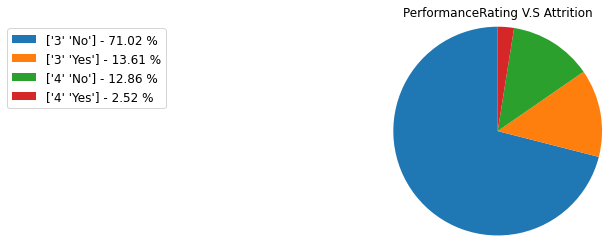

In [38]:
plt.title("PerformanceRating V.S Attrition")
x = np.array(list(df[['PerformanceRating', 'Attrition']].value_counts().index))
y = np.array(list(df[['PerformanceRating', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Relationship Satisfaction

Text(0.5, 1.0, 'Çalışan İlişkiler Memnuniyeti ve Ayrılma Dağılımı')

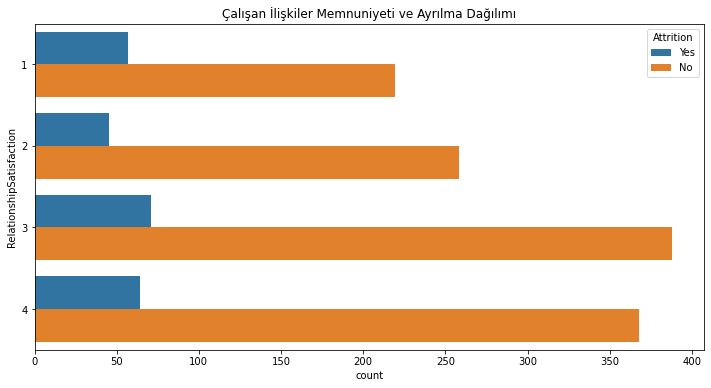

In [39]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="RelationshipSatisfaction", hue='Attrition', data=df).set_title('Çalışan İlişkiler Memnuniyeti ve Ayrılma Dağılımı')

## Stock Option Level

Text(0.5, 1.0, 'Stock Option Seviyesi ve Ayrılma Dağılımı')

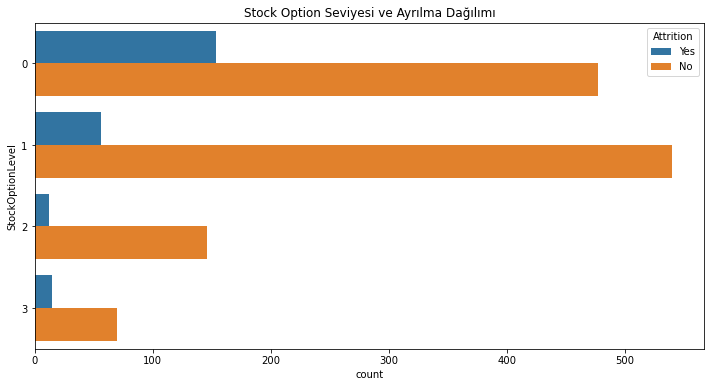

In [40]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="StockOptionLevel", hue='Attrition', data=df).set_title('Stock Option Seviyesi ve Ayrılma Dağılımı')

## Total Working Years

In [41]:
df.hvplot.hist(y="TotalWorkingYears", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

## Training Times Last Year

In [42]:
df.hvplot.hist(y="TrainingTimesLastYear", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

## Work Life Balance

Text(0.5, 1.0, 'İş-Hayat Dengesi ve Ayrılma Dağılımı')

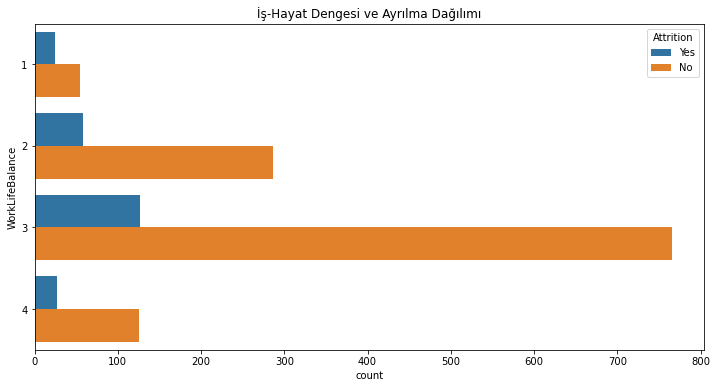

In [43]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="WorkLifeBalance", hue='Attrition', data=df).set_title('İş-Hayat Dengesi ve Ayrılma Dağılımı')

## Years At Company

**Şirkette yeni kişiler eski kişilere göre ayrılmaya daha mı meyilli?**

In [44]:
df.hvplot.hist(y="YearsAtCompany", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

## Years In Current Role

In [45]:
df.hvplot.hist(y="YearsInCurrentRole", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsInCurrentRole]   (YearsInCurrentRole_count)

## Years Since Last Promotion

In [46]:
df.hvplot.hist(y="YearsSinceLastPromotion", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsSinceLastPromotion]   (YearsSinceLastPromotion_count)

## Years With Current Manager

In [47]:
df.hvplot.hist(y="YearsWithCurrManager", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsWithCurrManager]   (YearsWithCurrManager_count)

# Data Cleaning

In [48]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [51]:
label_encoder = LabelEncoder()
  
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Attrition']= label_encoder.fit_transform(df['Attrition'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])


df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0        19479                   8         1                 11   
1        24907                   1         0                 23   
2         2396                   6         1                 15   
3        23159                   1         1                 11   
4        16632                   9         0                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [52]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [53]:
def setcategory_bus(text):
    
    if text=='Travel_Rarely':
        return 1
    
    elif text=='Travel_Frequently':
        return 2
    
    else:
        return 0
        
    
    
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda text:setcategory_bus(text))
df.head()

Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0        19479                   8         1                 11   
1        24907                   1         0                 23   
2         2396                   6         1                 15   
3        23159                   1         1                 11   
4        16632                   9         0                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [54]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [55]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [56]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [57]:
df = pd.get_dummies(df, columns = ['Department',"EducationField", "JobRole", "MaritalStatus"])

In [58]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               1       1102                 1          2   
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               2                        3       1          61   
2               4                        4       1          92   
3               5                        4       0          56   
4               7                        1       1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_Human Resources  \
0                        0                     5                           0   
1                        1                     7                           0   
2                        0                     0                           0   
3                        3                     0                           0   
4                        2                     2                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0              

In [59]:
df.EmployeeNumber.nunique()

1470

In [60]:
df.drop(columns=["Education"], inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int32
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [62]:
df.describe().T

count          mean          std     min  \
Age                                1470.0     36.923810     9.135373    18.0   
Attrition                          1470.0      0.161224     0.367863     0.0   
BusinessTravel                     1470.0      1.086395     0.532170     0.0   
DailyRate                          1470.0    802.485714   403.509100   102.0   
DistanceFromHome                   1470.0      9.192517     8.106864     1.0   
EmployeeNumber                     1470.0   1024.865306   602.024335     1.0   
EnvironmentSatisfaction            1470.0      2.721769     1.093082     1.0   
Gender                             1470.0      0.600000     0.490065     0.0   
HourlyRate                         1470.0     65.891156    20.329428    30.0   
JobInvolvement                     1470.0      2.729932     0.711561     1.0   
JobLevel                           1470.0      2.063946     1.106940     1.0   
JobSatisfaction                    1470.0      2.728571     1.102846     1.0   
MonthlyIncome                      1470.0   6502.931293  4707.956783  1009.0   
MonthlyRate                        1470.0  14313.103401  7117.786044  2094.0   
NumCompaniesWorked                 1470.0      2.693197     2.498009     0.0   
OverTime                           1470.0      0.282993     0.450606     0.0   
PercentSalaryHike                  1470.0     15.209524     3.659938    11.0   
PerformanceRating                  1470.0      3.153741     0.360824     3.0   
RelationshipSatisfaction           1470.0      2.712245     1.081209     1.0   
StockOptionLevel                   1470.0      0.793878     0.852077     0.0   
TotalWorkingYears                  1470.0     11.279592     7.780782     0.0   
TrainingTimesLastYear              1470.0      2.799320     1.289271     0.0   
WorkLifeBalance                    1470.0      2.761224     0.706476     1.0   
YearsAtCompany                     1470.0      7.008163     6.126525     0.0   
YearsInCurrentRole                 1470.0      4.229252     3.623137     0.0   
YearsSinceLastPromotion            1470.0      2.187755     3.222430     0.0   
YearsWithCurrManager               1470.0      4.123129     3.568136     0.0   
Department_Human Resources         1470.0      0.042857     0.202604     0.0   
Department_Research & Development  1470.0      0.653741     0.475939     0.0   
Department_Sales                   1470.0      0.303401     0.459884     0.0   
EducationField_Human Resources     1470.0      0.018367     0.134321     0.0   
EducationField_Life Sciences       1470.0      0.412245     0.492406     0.0   
EducationField_Marketing           1470.0      0.108163     0.310692     0.0   
EducationField_Medical             1470.0      0.315646     0.464931     0.0   
EducationField_Other               1470.0      0.055782     0.229579     0.0   
EducationField_Technical Degree    1470.0      0.089796     0.285986     0.0   
JobRole_Healthcare Representative  1470.0      0.089116     0.285008     0.0   
JobRole_Human Resources            1470.0      0.035374     0.184786     0.0   
JobRole_Laboratory Technician      1470.0      0.176190     0.381112     0.0   
JobRole_Manager                    1470.0      0.069388     0.254199     0.0   
JobRole_Manufacturing Director     1470.0      0.098639     0.298279     0.0   
JobRole_Research Director          1470.0      0.054422     0.226925     0.0   
JobRole_Research Scientist         1470.0      0.198639     0.399112     0.0   
JobRole_Sales Executive            1470.0      0.221769     0.415578     0.0   
JobRole_Sales Representative       1470.0      0.056463     0.230891     0.0   
MaritalStatus_Divorced             1470.0      0.222449     0.416033     0.0   
MaritalStatus_Married              1470.0      0.457823     0.498387     0.0   
MaritalStatus_Single               1470.0      0.319728     0.466530     0.0   

                                       25%      50%       75%      max  
Age                                  30.00

[Text(0.5, 1.0, 'Correlation Matrix')]

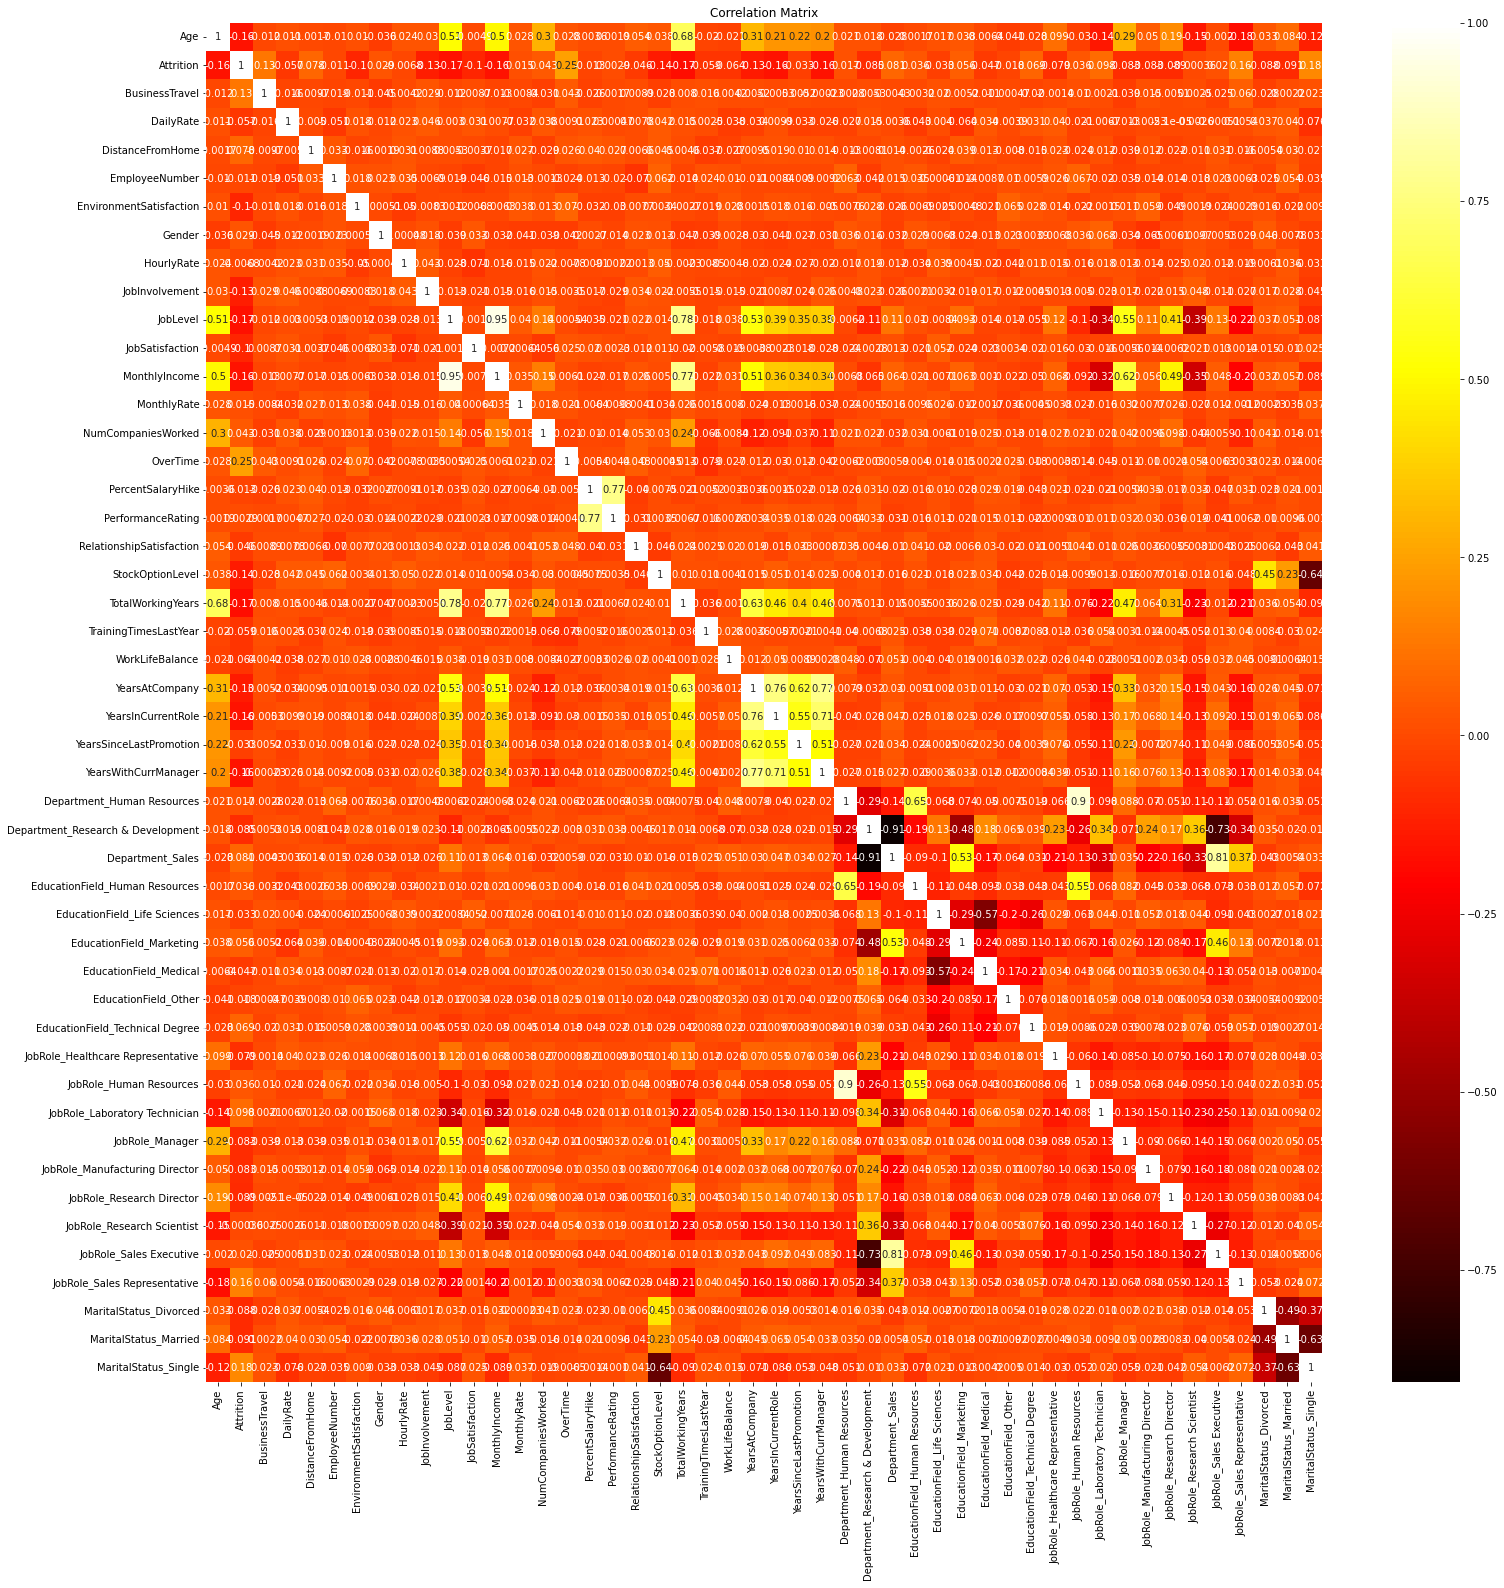

In [63]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

**"JobLevel", "TotalWorkingYears", "Department_Sales" ve "JobRole_Human Resources" değişkenleri diğer değişkenler ile çok yüksek korelasyonlara sahip oldukları için modelden çıkartılmışlardır.**

In [64]:
df.drop(columns=["JobLevel", "TotalWorkingYears", "Department_Sales", "JobRole_Human Resources"], inplace=True)

[Text(0.5, 1.0, 'Correlation Matrix')]

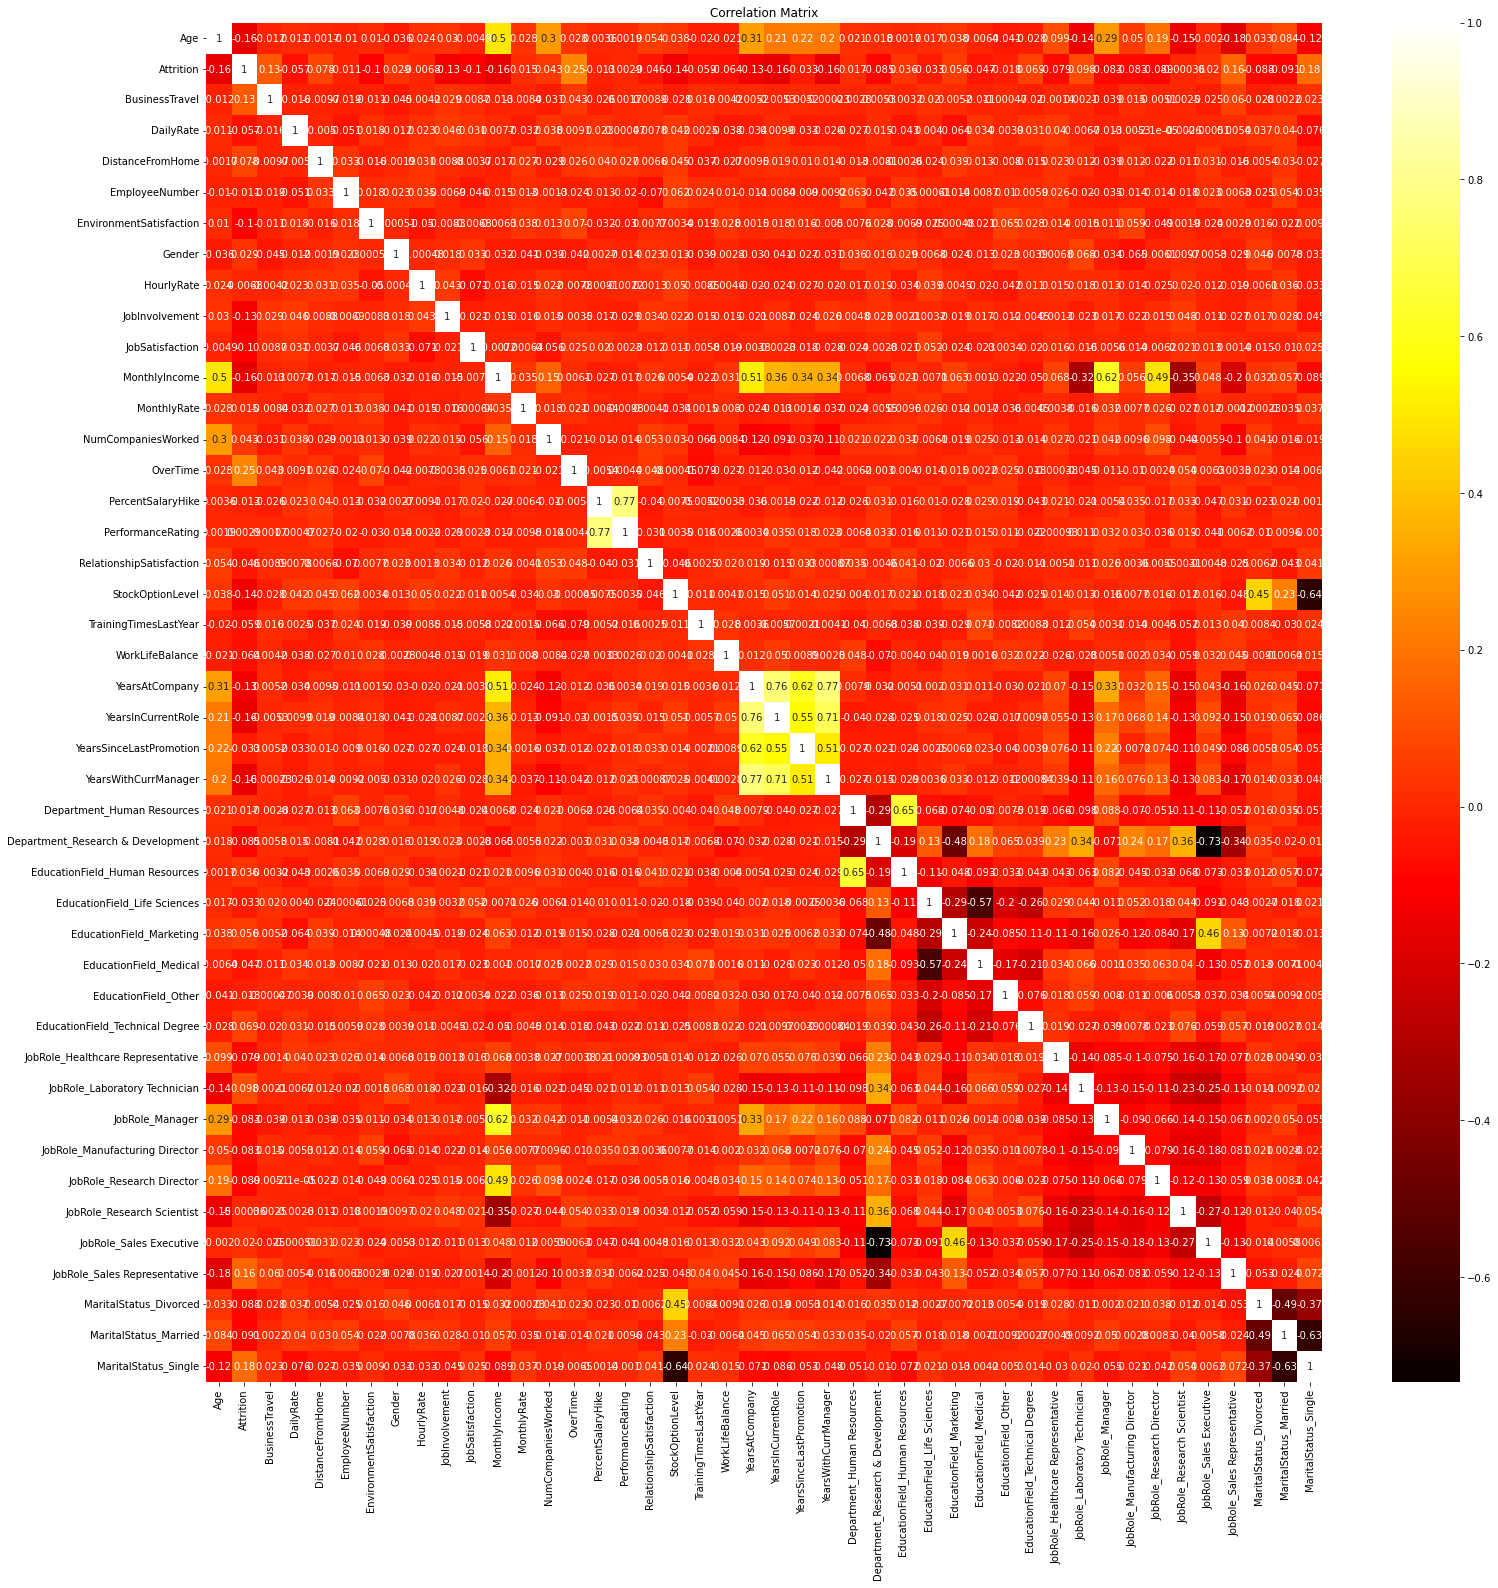

In [65]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

# Statistical Analysis

***İstatistikte Ki-Kare testi kategorik değişkenler arasındaki ilişkiyi test etmek için kullanılır. <br> T testi ise iki grup ortalaması arasındaki farkın istatistiksel anlamlılığını test etmek için kullanılır.***

**SORULAR** <br>
1-)  *Erkekler kadınlara göre ayrılmaya daha meyilli midir? <br>
2-)  Genç olan erkekler yaşı ilerlemiş erkeklere göre ayrılmaya daha meyilli midir? <br>
3-)  Daha sık seyahat eden çalışanlar diğer çalışanlara göre ayrılmaya daha meyilli midir? <br>
4-)  İşyerine uzaklığı fazla olan kişiler yakın olan kişilere göre ayrılmaya daha mı meyilli? <br>
5-)  İşe bağlılık seviyesi düşük olan çalışanlar ayrılmaya daha mı meyilli? <br>
6-)  Bekar kişiler diğerlerine göre ayrılmaya daha mı meyilli? <br>
7-)  Aylık maaşı az olan kişiler  fazla olan kişilere göre ayrılmaya daha mı meyilli? <br>
8-)  Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha mı meyilli? <br>
9-)  Maaşına az zam alan kişiler fazla zam alan kişilere göre ayrılmaya daha mı meyilli? <br>
10-) Şirkette yeni kişiler eski kişilere göre ayrılmaya daha mı meyilli?*

***Testlerimizi 0.05 anlamlılık düzeyinde gerçekleştireceğiz.***

In [66]:
alpha=0.05

***1.SORU***

***İşten ayrılmada cinsiyetin önemli bir faktör olup olmadığını test edeceğiz.***

In [67]:
df.groupby("Gender").mean()

Age  Attrition  BusinessTravel   DailyRate  DistanceFromHome  \
Gender                                                                       
0       37.329932   0.147959        1.115646  808.273810          9.210884   
1       36.653061   0.170068        1.066893  798.626984          9.180272   

        EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Gender                                                                        
0          1008.239796                 2.721088   65.903061        2.714286   
1          1035.948980                 2.722222   65.883220        2.740363   

        JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
Gender                                                                     
0              2.683673    6686.566327  14674.600340            2.812925   
1              2.758503    6380.507937  14072.105442            2.613379   

        OverTime  PercentSalaryHike  PerformanceRating  \
Gender                                                   
0       0.306122          15.197279           3.159864   
1       0.267574          15.217687           3.149660   

        RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
Gender                                                                      
0                       2.681973          0.780612               2.860544   
1                       2.732426          0.802721               2.758503   

        WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Gender                                                        
0              2.763605        7.231293            4.413265   
1              2.759637        6.859410            4.106576   

        YearsSinceLastPromotion  YearsWithCurrManager  \
Gender                                                  
0                      2.294218              4.256803   
1                      2.116780              4.034014   

        Department_Human Resources  Department_Research & Development  \
Gender                                                                  
0                         0.034014                           0.644558   
1                         0.048753                           0.659864   

        EducationField_Human Resources  EducationField_Life Sciences  \
Gender                                                                 
0                             0.013605                      0.408163   
1                             0.021542                      0.414966   

        EducationField_Marketing  EducationField_Medical  \
Gender                                                     
0                       0.117347                0.323129   
1                       0.102041                0.310658   

        EducationField_Other  EducationField_Technical Degree  \
Gender                                                          
0                   0.049320                         0.088435   
1                   0.060091                         0.090703   

        JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
Gender                                                                     
0                                0.086735                       0.144558   
1                                0.090703                       0.197279   

        JobRole_Manager  JobRole_Manufacturing Director  \
Gender                                                    
0              0.079932                        0.122449   
1              0.062358                        0.082766   

        JobRole_Research Director  JobRole_Research Scientist  \
Gender                                                          
0                        0.056122                    0.193878   
1                        0.053288                    0.201814   

        JobRole_Sales Executive  JobRole_Sales Representative  \
Gender                                                          
0                      0.224490       

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Cinsiyet işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Cinsiyet işten ayrılmada önemli bir faktördür.

In [68]:
observed=pd.crosstab(index=df["Attrition"], columns=df["Gender"])
test_result, p_value_gender, ser_der, expected=chi2_contingency(observed)

In [69]:
if p_value_gender<alpha:
    print("p-value:", p_value_gender,"\n\nSıfır hipotezini reddederiz. Cinsiyet işten ayrılmada önemli bir faktördür. Erkekler kadınlara göre ayrılmaya"
          "daha meyillidir")
else:
    print("p-value:", p_value_gender,"\n\nSıfır hipotezini reddedemeyiz. Cinsiyet işten ayrılmada önemli bir faktör değildir")

p-value: 0.29057244902890855 

Sıfır hipotezini reddedemeyiz. Cinsiyet işten ayrılmada önemli bir faktör değildir


***2.SORU***

***İşten ayrılan erkeklerin yaşlarının ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark olup olmadığıın test edeceğiz.***

***İki grup t testini uygulamamız için 2 varsayımın sağlanması gerekiyor. Birincisi grupların normal dağılması ikincisi ise grupların varyanslarının eşit olması. Normallik için Shapiro-Wilk, varyans için Levene testini uygulayacağız.***

In [70]:
G11 = df[(df["Gender"]==1) & (df["Attrition"]==1)].Age
G10 = df[(df["Gender"]==1) & (df["Attrition"]==0)].Age

<d><i>G1</i><sub>1</sub>: İşten ayrılan erkeklerin yaşları. <br>
<d><i>G1</i><sub>0</sub>: İşten ayrılmayan erkeklerin yaşları.

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>G1</i><sub>1</sub>'in dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>G1</i><sub>1</sub>'in dağılımı ile normal dağılım arasında fark vardır.

In [71]:
name = ['normality test', 'p-value']
test = shapiro(G11)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.9481711387634277, pvalue=2.3152020730776712e-05) 

Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


***Bu varsayım sağlanmadığı için diğer grubun normalliğini ve grupların varyanslarının eşit olup olmadığını ölçmeye gerek yoktur. Bu yüzden İki Grup T testinin non-parametrik karşılığı olan Mann-Whitney U testini kullanacağız.***

<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan erkeklerin yaşlarının ortalaması</i> <br>
<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan erkeklerin yaşlarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub><<d><i>μ</i><sub>1</sub>

In [72]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(G11, G10)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan erkeklerin yaşlarının "
           "ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark vardır. Genç olan erkekler işten ayrılmaya "
          "daha meyillidir")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt vadır. İşten ayrılan erkeklerin yaşlarının "
           "ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir farklılık yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan erkeklerin yaşlarının ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark vardır. Genç olan erkekler işten ayrılmaya daha meyillidir


***3.SORU***

In [73]:
df.groupby("BusinessTravel").mean()

Age  Attrition   DailyRate  DistanceFromHome  \
BusinessTravel                                                       
0               36.620000   0.080000  816.960000          9.760000   
1               37.092042   0.149569  803.022052          9.088207   
2               36.454874   0.249097  792.628159          9.277978   

                EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
BusinessTravel                                                                  
0                  1064.626667                 2.733333  0.673333   64.866667   
1                  1021.793864                 2.727709  0.595398   66.249281   
2                  1014.898917                 2.693141  0.577617   65.097473   

                JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
BusinessTravel                                                                 
0                     2.633333         2.793333    6261.946667  14635.600000   
1                     2.742090         2.702780    6619.707574  14265.372963   
2                     2.736462         2.790614    6193.725632  14318.187726   

                NumCompaniesWorked  OverTime  PercentSalaryHike  \
BusinessTravel                                                    
0                         2.713333  0.233333          15.606667   
1                         2.744966  0.282838          15.165868   
2                         2.487365  0.310469          15.158845   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
BusinessTravel                                                                  
0                        3.173333                  2.780000          0.866667   
1                        3.147651                  2.685523          0.790988   
2                        3.166065                  2.776173          0.765343   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
BusinessTravel                                                           
0                            2.720000         2.773333        7.146667   
1                            2.806328         2.755513        6.944391   
2                            2.815884         2.776173        7.173285   

                YearsInCurrentRole  YearsSinceLastPromotion  \
BusinessTravel                                                
0                         4.353333                 2.386667   
1                         4.208054                 2.117929   
2                         4.241877                 2.342960   

                YearsWithCurrManager  Department_Human Resources  \
BusinessTravel                                                     
0                           4.300000                    0.040000   
1                           4.072867                    0.044104   
2                           4.216606                    0.039711   

                Department_Research & Development  \
BusinessTravel                                      
0                                        0.646667   
1                                        0.653883   
2                                        0.657040   

                EducationField_Human Resources  EducationField_Life Sciences  \
BusinessTravel                                                                 
0                                     0.026667                      0.420000   
1                                     0.016299                      0.402685   
2                                     0.021661                      0.444043   

                EducationField_Marketing  EducationField_Medical  \
BusinessTravel                                                     
0                               0.080000                0.333333   
1                               0.115053                0.314477   
2                               0.097473                0.310469   

                EducationField_Other  EducationField_Technical Degree  \
BusinessTrave

***İşten ayrılmada sık sık seyahat etmenin önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Seyahat sıklığı işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Seyahat sıklığı işten ayrılmada önemli bir faktördür.

In [74]:
observed=pd.crosstab(index=df["Attrition"], columns=df["BusinessTravel"])
test_result, p_value_travel, ser_der, expected=chi2_contingency(observed)

In [75]:
if p_value_travel<alpha:
    print("p-value:", p_value_travel,"\n\nSıfır hipotezini reddederiz. Seyahat sıklığı işten ayrılmada önemli bir faktördür. Daha sık seyahat eden "
          "kişiler diğer kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Seyahat sıklığı işten ayrılmada önemli bir faktör değildir.")

p-value: 5.608614476449942e-06 

Sıfır hipotezini reddederiz. Seyahat sıklığı işten ayrılmada önemli bir faktördür. Daha sık seyahat eden kişiler diğer kişilere göre ayrılmaya daha 
meyillidirler.


***4.SORU***

In [76]:
df.groupby("Attrition").mean()

Age  BusinessTravel   DailyRate  DistanceFromHome  \
Attrition                                                            
0          37.561233        1.056772  812.504461          8.915653   
1          33.607595        1.240506  750.362869         10.632911   

           EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
Attrition                                                                  
0             1027.656123                 2.771290  0.593674   65.952149   
1             1010.345992                 2.464135  0.632911   65.573840   

           JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Attrition                                                                 
0                2.770479         2.778589    6832.739659  14265.779400   
1                2.518987         2.468354    4787.092827  14559.308017   

           NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
Attrition                                                                       
0                    2.645580  0.234388          15.231144           3.153285   
1                    2.940928  0.535865          15.097046           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
Attrition                                                                      
0                          2.733982          0.845093               2.832928   
1                          2.599156          0.527426               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
0                 2.781022        7.369019            4.484185   
1                 2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                  
0                         2.234388              4.367397   
1                         1.945148              2.852321   

           Department_Human Resources  Department_Research & Development  \
Attrition                                                                  
0                            0.041363                           0.671533   
1                            0.050633                           0.561181   

           EducationField_Human Resources  EducationField_Life Sciences  \
Attrition                                                                 
0                                0.016221                      0.419303   
1                                0.029536                      0.375527   

           EducationField_Marketing  EducationField_Medical  \
Attrition                                                     
0                          0.100568                0.325223   
1                          0.147679                0.265823   

           EducationField_Other  EducationField_Technical Degree  \
Attrition                                                          
0                      0.057583                         0.081103   
1                      0.046414                         0.135021   

           JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
Attrition                                                                     
0                                   0.098946                       0.159773   
1                                   0.037975                       0.261603   

           JobRole_Manager  JobRole_Manufacturing Director  \
Attrition                                                    
0                 0.078670                        0.109489   
1                 0.021097                        0.042194   

           JobRole_Research Director  JobRole_Research Scientist  \
Attrition                                                          
0                           0.063260                    0.198702   
1                           0.008439                    0.198312   

       

***İşten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine olan uzaklıklarınınn ortalaması arasında anlamlı bir fark olup olmadığıın test edeceğiz.***

In [77]:
dis1 = df[df["Attrition"]==1].DistanceFromHome
dis0 = df[df["Attrition"]==0].DistanceFromHome

<d><i>dis1</i>: İşten ayrılan kişilerin işyerine olan uzaklıklar. <br>
<d><i>dis0</i>: İşten ayrılmayan kişilerin işyerine olan uzaklıklar.

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>dis0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>dis0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [78]:
name = ['normality test', 'p-value']
test = shapiro(dis0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8534793257713318, pvalue=2.4682859931885524e-32) 

Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


***Bu varsayım sağlanmadığı için diğer grubun normalliğini ve grupların varyanslarının eşit olup olmadığını ölçmeye gerek yoktur. Bu yüzden İki Grup T testinin non-parametrik karşılığı olan Mann-Whitney U testini kullanacağız.***

<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin işyerine olan uzaklıklarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub><<d><i>μ</i><sub>1</sub>

In [79]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(dis0, dis1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin işyerine "
           "olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark vardır. İşyerine"
          " uzak olan kişiler daha çok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin işyerine "
           "olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.002 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark vardır. İşyerine uzak olan kişiler daha çok işten ayrılır.


***5.SORU***

In [80]:
df.groupby("JobInvolvement").mean()

Age  Attrition  BusinessTravel   DailyRate  \
JobInvolvement                                                     
1               35.975904   0.337349        1.012048  726.951807   
2               36.528000   0.189333        1.077333  787.968000   
3               37.209677   0.144009        1.096774  814.279954   
4               36.777778   0.090278        1.090278  812.736111   

                DistanceFromHome  EmployeeNumber  EnvironmentSatisfaction  \
JobInvolvement                                                              
1                       9.915663     1096.578313                 2.566265   
2                       8.826667     1013.650667                 2.757333   
3                       9.215438     1018.976959                 2.746544   
4                       9.590278     1048.229167                 2.569444   

                  Gender  HourlyRate  JobSatisfaction  MonthlyIncome  \
JobInvolvement                                                         
1               0.626506   64.927711         2.915663    6418.108434   
2               0.576000   64.866667         2.680000    6609.648000   
3               0.602535   66.003456         2.745392    6521.637097   
4               0.631944   68.437500         2.645833    6161.159722   

                 MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
JobInvolvement                                                                  
1               14664.590361            2.506024  0.301205          15.807229   
2               14602.298667            2.637333  0.280000          15.202667   
3               14102.298387            2.750000  0.282258          15.119816   
4               14628.083333            2.604167  0.284722          15.423611   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
JobInvolvement                                                                  
1                        3.204819                  2.650602          0.891566   
2                        3.154667                  2.656000          0.746667   
3                        3.150922                  2.733871          0.784562   
4                        3.138889                  2.763889          0.916667   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
JobInvolvement                                                           
1                            2.927711         2.734940        6.939759   
2                            2.754667         2.789333        7.330667   
3                            2.824885         2.756912        6.906682   
4                            2.687500         2.729167        6.819444   

                YearsInCurrentRole  YearsSinceLastPromotion  \
JobInvolvement                                                
1                         4.253012                 2.253012   
2                         4.162667                 2.256000   
3                         4.241935                 2.203917   
4                         4.312500                 1.875000   

                YearsWithCurrManager  Department_Human Resources  \
JobInvolvement                                                     
1                           3.987952                    0.036145   
2                           4.053333                    0.045333   
3                           4.110599                    0.041475   
4                           4.458333                    0.048611   

                Department_Research & Development  \
JobInvolvement                                      
1                                        0.614458   
2                                        0.661333   
3                                        0.645161   
4                                        0.708333   

                EducationField_Human Resources  EducationField_Life Sciences  \
JobInvolvement                                                                 
1                              

***İşten ayrılmada çalışanın işe bağlılık seviyesinin önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  İşe bağlılık seviyesi işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür.

In [81]:
observed=pd.crosstab(index=df["Attrition"], columns=df["JobInvolvement"])
test_result, p_value_job_i, ser_der, expected=chi2_contingency(observed)

In [82]:
if p_value_job_i<alpha:
    print("p-value:",p_value_job_i,"\n\nSıfır hipotezini reddederiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür. İşe bağlılık seviyesi"
          " düşük olan kişiler diğer kişilere göre ayrılmaya daha meyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktör değildir.")

p-value: 2.8631806367134195e-06 

Sıfır hipotezini reddederiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür. İşe bağlılık seviyesi düşük olan kişiler diğer kişilere göre ayrılmaya daha meyillidirler.


***6.SORU***

***İşten ayrılmada evlilik durumunun önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Evlilik durumu işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Evlilik durumu işten ayrılmada önemli bir faktördür.

In [83]:
observed=pd.crosstab(index=df["Attrition"], columns=df["MaritalStatus_Single"])
test_result, p_value_single, ser_der, expected=chi2_contingency(observed)

In [84]:
if p_value_single<alpha:
    print("p-value:", p_value_single,"\n\nSıfır hipotezini reddederiz. Evlilik durumu işten ayrılmada önemli bir faktördür. Hiç evlenmemiş kişiler" 
          " diğer kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Evlilik durumu işten ayrılmada önemli bir faktör değildir.")

p-value: 2.9387255399500764e-11 

Sıfır hipotezini reddederiz. Evlilik durumu işten ayrılmada önemli bir faktördür. Hiç evlenmemiş kişiler diğer kişilere göre ayrılmaya daha 
meyillidirler.


***7.SORU***

In [85]:
df.groupby("Attrition").mean()

Age  BusinessTravel   DailyRate  DistanceFromHome  \
Attrition                                                            
0          37.561233        1.056772  812.504461          8.915653   
1          33.607595        1.240506  750.362869         10.632911   

           EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
Attrition                                                                  
0             1027.656123                 2.771290  0.593674   65.952149   
1             1010.345992                 2.464135  0.632911   65.573840   

           JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Attrition                                                                 
0                2.770479         2.778589    6832.739659  14265.779400   
1                2.518987         2.468354    4787.092827  14559.308017   

           NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
Attrition                                                                       
0                    2.645580  0.234388          15.231144           3.153285   
1                    2.940928  0.535865          15.097046           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
Attrition                                                                      
0                          2.733982          0.845093               2.832928   
1                          2.599156          0.527426               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
0                 2.781022        7.369019            4.484185   
1                 2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                  
0                         2.234388              4.367397   
1                         1.945148              2.852321   

           Department_Human Resources  Department_Research & Development  \
Attrition                                                                  
0                            0.041363                           0.671533   
1                            0.050633                           0.561181   

           EducationField_Human Resources  EducationField_Life Sciences  \
Attrition                                                                 
0                                0.016221                      0.419303   
1                                0.029536                      0.375527   

           EducationField_Marketing  EducationField_Medical  \
Attrition                                                     
0                          0.100568                0.325223   
1                          0.147679                0.265823   

           EducationField_Other  EducationField_Technical Degree  \
Attrition                                                          
0                      0.057583                         0.081103   
1                      0.046414                         0.135021   

           JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
Attrition                                                                     
0                                   0.098946                       0.159773   
1                                   0.037975                       0.261603   

           JobRole_Manager  JobRole_Manufacturing Director  \
Attrition                                                    
0                 0.078670                        0.109489   
1                 0.021097                        0.042194   

           JobRole_Research Director  JobRole_Research Scientist  \
Attrition                                                          
0                           0.063260                    0.198702   
1                           0.008439                    0.198312   

       

***İşten ayrılan kişilerin aylık maaşlarının ortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [86]:
mis1 = df[df["Attrition"]==1].MonthlyIncome
mis0 = df[df["Attrition"]==0].MonthlyIncome

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>mis0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>mis0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [87]:
name = ['normality test', 'p-value']
test = shapiro(mis0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8341342210769653, pvalue=5.970143412461947e-34) 

Sıfır hipotezini reddederiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin aylık maaşlarının ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin aylık maaşlarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [88]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(mis0, mis1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aylık "
           "maaşlarının \nortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark vardır. Aylık maaşı düşük"
          " olan kişiler daha çok işten \nayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aylık "
           "maaşlarının ortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aylık maaşlarının 
ortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark vardır. Aylık maaşı düşük olan kişiler daha çok işten 
ayrılır.


***8.SORU***

***İşten ayrılmada mesai durumunun önemli bir faktör olup olmadığına bakacağız.***

In [89]:
df.groupby("OverTime").mean()

Age  Attrition  BusinessTravel   DailyRate  DistanceFromHome  \
OverTime                                                                       
0         36.762808   0.104364        1.072106  800.170778          9.062619   
1         37.331731   0.305288        1.122596  808.350962          9.521635   

          EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
OverTime                                                                  
0            1033.953510                 2.673624  0.612903   65.990512   
1            1001.838942                 2.843750  0.567308   65.639423   

          JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
OverTime                                                                 
0               2.731499         2.711575    6484.926945  14217.302657   
1               2.725962         2.771635    6548.548077  14555.829327   

          NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
OverTime                                                             
0                   2.725806          15.222011           3.152751   
1                   2.610577          15.177885           3.156250   

          RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
OverTime                                                                      
0                         2.679317          0.794118               2.863378   
1                         2.795673          0.793269               2.637019   

          WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
OverTime                                                        
0                2.773245        7.053131            4.296964   
1                2.730769        6.894231            4.057692   

          YearsSinceLastPromotion  YearsWithCurrManager  \
OverTime                                                  
0                        2.212524              4.216319   
1                        2.125000              3.887019   

          Department_Human Resources  Department_Research & Development  \
OverTime                                                                  
0                           0.043643                           0.654649   
1                           0.040865                           0.651442   

          EducationField_Human Resources  EducationField_Life Sciences  \
OverTime                                                                 
0                               0.018027                      0.416509   
1                               0.019231                      0.401442   

          EducationField_Marketing  EducationField_Medical  \
OverTime                                                     
0                         0.105313                0.314991   
1                         0.115385                0.317308   

          EducationField_Other  EducationField_Technical Degree  \
OverTime                                                          
0                     0.052182                         0.092979   
1                     0.064904                         0.081731   

          JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
OverTime                                                                     
0                                  0.089184                       0.186907   
1                                  0.088942                       0.149038   

          JobRole_Manager  JobRole_Manufacturing Director  \
OverTime                                                    
0                0.071157                        0.100569   
1                0.064904                        0.093750   

          JobRole_Research Director  JobRole_Research Scientist  \
OverTime                                                          
0                          0.054080                    0.185009   
1                          0.055288                    0.233173   

          JobRole_Sales Executive  JobRole_Sales Represent

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Mesai durumu işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Mesai durumu işten ayrılmada önemli bir faktördür.

In [90]:
observed=pd.crosstab(index=df["Attrition"], columns=df["OverTime"])
test_result, p_value_overtime, ser_der, expected=chi2_contingency(observed)

In [91]:
if p_value_overtime<alpha:
    print("p-value:", p_value_single,"\n\nSıfır hipotezini reddederiz. Mesai durumu işten ayrılmada önemli bir faktördür. Mesai yapan kişiler" 
          " yapmayan kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Mesai durumu işten ayrılmada önemli bir faktör değildir.")

p-value: 2.9387255399500764e-11 

Sıfır hipotezini reddederiz. Mesai durumu işten ayrılmada önemli bir faktördür. Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha 
meyillidirler.


***9.SORU***

***İşten ayrılan kişilerin aldıkları zamların ortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [92]:
df.groupby("Attrition").mean()

Age  BusinessTravel   DailyRate  DistanceFromHome  \
Attrition                                                            
0          37.561233        1.056772  812.504461          8.915653   
1          33.607595        1.240506  750.362869         10.632911   

           EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
Attrition                                                                  
0             1027.656123                 2.771290  0.593674   65.952149   
1             1010.345992                 2.464135  0.632911   65.573840   

           JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Attrition                                                                 
0                2.770479         2.778589    6832.739659  14265.779400   
1                2.518987         2.468354    4787.092827  14559.308017   

           NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
Attrition                                                                       
0                    2.645580  0.234388          15.231144           3.153285   
1                    2.940928  0.535865          15.097046           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
Attrition                                                                      
0                          2.733982          0.845093               2.832928   
1                          2.599156          0.527426               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
0                 2.781022        7.369019            4.484185   
1                 2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                  
0                         2.234388              4.367397   
1                         1.945148              2.852321   

           Department_Human Resources  Department_Research & Development  \
Attrition                                                                  
0                            0.041363                           0.671533   
1                            0.050633                           0.561181   

           EducationField_Human Resources  EducationField_Life Sciences  \
Attrition                                                                 
0                                0.016221                      0.419303   
1                                0.029536                      0.375527   

           EducationField_Marketing  EducationField_Medical  \
Attrition                                                     
0                          0.100568                0.325223   
1                          0.147679                0.265823   

           EducationField_Other  EducationField_Technical Degree  \
Attrition                                                          
0                      0.057583                         0.081103   
1                      0.046414                         0.135021   

           JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
Attrition                                                                     
0                                   0.098946                       0.159773   
1                                   0.037975                       0.261603   

           JobRole_Manager  JobRole_Manufacturing Director  \
Attrition                                                    
0                 0.078670                        0.109489   
1                 0.021097                        0.042194   

           JobRole_Research Director  JobRole_Research Scientist  \
Attrition                                                          
0                           0.063260                    0.198702   
1                           0.008439                    0.198312   

       

In [93]:
psh1 = df[df["Attrition"]==1].PercentSalaryHike
psh0 = df[df["Attrition"]==0].PercentSalaryHike

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>psh0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>psh0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [94]:
test = shapiro(psh0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.9026836156845093, pvalue=2.707782968319606e-27) 

Sıfır hipotezini reddederiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin aldıkları zamların ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin aldıkları zamların ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [95]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(psh0, psh1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aldıkları "
           "zamların \nortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark vardır. Aldıkları zam oranı"
          "düşük olan kişiler daha \nçok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aldıkları "
           "zamların \nortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.366 

Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aldıkları zamların 
ortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark yoktur


***10.SORU***

***İşten ayrılan kişilerin şirkette geçirdikleri yılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [96]:
df.groupby("Attrition").mean()

Age  BusinessTravel   DailyRate  DistanceFromHome  \
Attrition                                                            
0          37.561233        1.056772  812.504461          8.915653   
1          33.607595        1.240506  750.362869         10.632911   

           EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
Attrition                                                                  
0             1027.656123                 2.771290  0.593674   65.952149   
1             1010.345992                 2.464135  0.632911   65.573840   

           JobInvolvement  JobSatisfaction  MonthlyIncome   MonthlyRate  \
Attrition                                                                 
0                2.770479         2.778589    6832.739659  14265.779400   
1                2.518987         2.468354    4787.092827  14559.308017   

           NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
Attrition                                                                       
0                    2.645580  0.234388          15.231144           3.153285   
1                    2.940928  0.535865          15.097046           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
Attrition                                                                      
0                          2.733982          0.845093               2.832928   
1                          2.599156          0.527426               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
0                 2.781022        7.369019            4.484185   
1                 2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                  
0                         2.234388              4.367397   
1                         1.945148              2.852321   

           Department_Human Resources  Department_Research & Development  \
Attrition                                                                  
0                            0.041363                           0.671533   
1                            0.050633                           0.561181   

           EducationField_Human Resources  EducationField_Life Sciences  \
Attrition                                                                 
0                                0.016221                      0.419303   
1                                0.029536                      0.375527   

           EducationField_Marketing  EducationField_Medical  \
Attrition                                                     
0                          0.100568                0.325223   
1                          0.147679                0.265823   

           EducationField_Other  EducationField_Technical Degree  \
Attrition                                                          
0                      0.057583                         0.081103   
1                      0.046414                         0.135021   

           JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
Attrition                                                                     
0                                   0.098946                       0.159773   
1                                   0.037975                       0.261603   

           JobRole_Manager  JobRole_Manufacturing Director  \
Attrition                                                    
0                 0.078670                        0.109489   
1                 0.021097                        0.042194   

           JobRole_Research Director  JobRole_Research Scientist  \
Attrition                                                          
0                           0.063260                    0.198702   
1                           0.008439                    0.198312   

       

In [97]:
yac1 = df[df["Attrition"]==1].YearsAtCompany
yac0 = df[df["Attrition"]==0].YearsAtCompany

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>yac0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>yac0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [98]:
test = shapiro(yac0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8515459299087524, pvalue=1.6729588581128763e-32) 

Sıfır hipotezini reddederiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin şirkette geçirdikleri yılların ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [99]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(yac0, yac1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin şirkette "
           "geçirdikleri \nyılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark "
          "vardır. Şirkette yeni olan \nkişiler eski olan kişilere göre daha çok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin şirkette "
           "geçirdikleri yılların \nortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark "
          "yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin şirkette geçirdikleri 
yılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark vardır. Şirkette yeni olan 
kişiler eski olan kişilere göre daha çok işten ayrılır.


# Model

In [100]:
df

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  \
0      41          1               1       1102                 1   
1      49          0               2        279                 8   
2      37          1               1       1373                 2   
3      33          0               2       1392                 3   
4      27          0               1        591                 2   
...   ...        ...             ...        ...               ...   
1465   36          0               2        884                23   
1466   39          0               1        613                 6   
1467   27          0               1        155                 4   
1468   49          0               2       1023                 2   
1469   34          0               1        628                 8   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2       0          94   
1                  2                        3       1          61   
2                  4                        4       1          92   
3                  5                        4       0          56   
4                  7                        1       1          40   
...              ...                      ...     ...         ...   
1465            2061                        3       1          41   
1466            2062                        4       1          42   
1467            2064                        2       1          87   
1468            2065                        4       1          63   
1469            2068                        2       1          82   

      JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0                  3                4           5993        19479   
1                  2                2           5130        24907   
2                  2                3           2090         2396   
3                  3                3           2909        23159   
4                  3                2           3468        16632   
...              ...              ...            ...          ...   
1465               4                4           2571        12290   
1466               2                1           9991        21457   
1467               4                2           6142         5174   
1468               2                2           5390        13243   
1469               4                3           4404        10228   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                      8         1                 11                  3   
1                      1         0                 23                  4   
2                      6         1                 15                  3   
3                      1         1                 11                  3   
4                      9         0                 12                  3   
...                  ...       ...                ...                ...   
1465                   4         0                 17                  3   
1466                   4         0                 15                  3   
1467                   1         1                 20                  4   
1468                   2         0                 14                  3   
1469                   2         0                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                            1                 0                      0   
1                            4                 1                      3   
2                            2                 0                      3   
3                            3                 0                      3   
4                            4                 1                      3   
...                        ...               ...                    ...   
1465                         3                 1                      3   
1466  

In [101]:
x = df.drop(["Attrition", "EmployeeNumber"], axis=1)
y = df["Attrition"]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Random Forest

In [103]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
rf_predicts= rf.predict(x_test)

In [105]:
rf_cm= confusion_matrix(y_test, rf_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_cm)


Random Forest Confusion Matrix:

[[402   4]
 [ 66  14]]


In [106]:
target_names = ['0', '1']
print(classification_report(y_test, rf_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       406
           1       0.78      0.17      0.29        80

    accuracy                           0.86       486
   macro avg       0.82      0.58      0.60       486
weighted avg       0.85      0.86      0.82       486



In [109]:
cv  = StratifiedKFold(n_splits=7, shuffle=True, random_state=3)

In [111]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_f1)

Random Forest doğrulanmış f1 skoru: 0.2651535551534428


In [112]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_accuracy = mean(scor)
print("Random Forest doğrulanmış accuracy skoru:", rf_accuracy)

Random Forest doğrulanmış accuracy skoru: 0.8578231292517006


In [113]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_brier)

Random Forest doğrulanmış brier skoru: 0.10569029124149659


In [114]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = -1*[]
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.577328776151254


In [115]:
rf_class1_probs = rf.predict_proba(x_test)[:, 1]

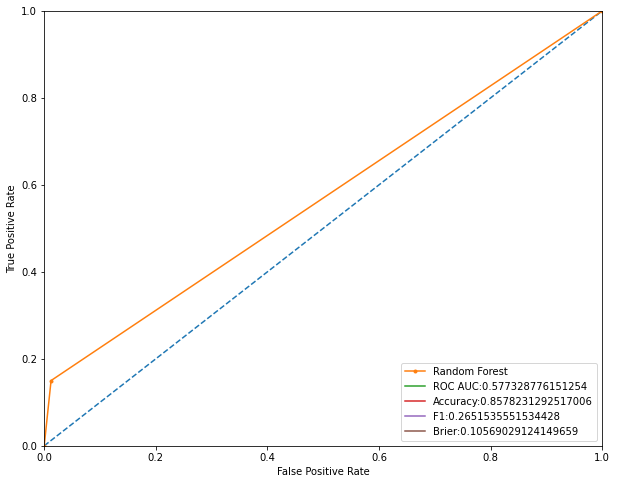

In [116]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot(0, label = 'ROC AUC:'+str(rf_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(rf_accuracy))
plt.plot(0, label = 'F1:'+str(rf_f1))
plt.plot(0, label = 'Brier:'+str(rf_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [117]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    precision = precision_score(y_test, rf_thresh_predicts)
    recall = recall_score(y_test, rf_thresh_predicts)
    f1 = f1_score(y_test, rf_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.167, Completeness = 1.000 | F1 = 0.287
Threshold = 0.02 | Accuracy = 0.170, Completeness = 0.988 | F1 = 0.290
Threshold = 0.03 | Accuracy = 0.175, Completeness = 0.975 | F1 = 0.297
Threshold = 0.04 | Accuracy = 0.183, Completeness = 0.975 | F1 = 0.308
Threshold = 0.05 | Accuracy = 0.189, Completeness = 0.963 | F1 = 0.316
Threshold = 0.06 | Accuracy = 0.194, Completeness = 0.925 | F1 = 0.321
Threshold = 0.07 | Accuracy = 0.205, Completeness = 0.912 | F1 = 0.335
Threshold = 0.08 | Accuracy = 0.225, Completeness = 0.912 | F1 = 0.360
Threshold = 0.09 | Accuracy = 0.235, Completeness = 0.900 | F1 = 0.373
Threshold = 0.10 | Accuracy = 0.248, Completeness = 0.887 | F1 = 0.388
Threshold = 0.11 | Accuracy = 0.255, Completeness = 0.863 | F1 = 0.393
Threshold = 0.12 | Accuracy = 0.270, Completeness = 0.863 | F1 = 0.411
Threshold = 0.13 | Accuracy = 0.289, Completeness = 0.863 | F1 = 0.433
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [118]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    f1 = f1_score(y_test, rf_thresh_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.547 and best threshold is: 0.26


In [119]:
def custom_predict(X, threshold):
    
    return (rf_class1_probs > threshold).astype(int)
    
    
rf_thresh_predicts = custom_predict(X = x_test, threshold = rf_best_threshold) 

In [120]:
rf_thresh_cm= confusion_matrix(y_test, rf_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_thresh_cm)


Random Forest Confusion Matrix:

[[361  45]
 [ 33  47]]


In [121]:
print(classification_report(y_test, rf_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       406
           1       0.51      0.59      0.55        80

    accuracy                           0.84       486
   macro avg       0.71      0.74      0.72       486
weighted avg       0.85      0.84      0.84       486



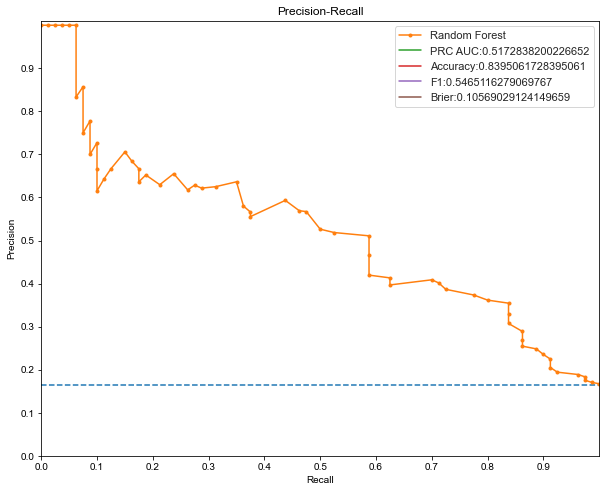

In [122]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_class1_probs)
rf_thresh_f1, rf_prc_auc = f1_score(y_test, rf_thresh_predicts), auc(recall, precision)
rf_thresh_accuracy = accuracy_score(y_test, rf_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.plot(0,label='PRC AUC:'+str(rf_prc_auc))
plt.plot(0,label='Accuracy:'+str(rf_thresh_accuracy))
plt.plot(0,label='F1:'+str(rf_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [123]:
rf_params = {'bootstrap': ['True'],
             "criterion":["gini", "entropy"], 
             "max_depth": [2,5,8,10],
             "min_samples_leaf":[1, 2, 3, 5, 10],
            "max_features": [2,5,8, 'auto'],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [124]:
rf_tuned = RandomizedSearchCV(rf, 
                           rf_params, 
                           cv = cv,
                           n_iter = 200,
                           scoring = 'f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [121]:
rf_tuned.fit(x_train, y_train)

Fitting 7 folds for each of 200 candidates, totalling 1400 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=3, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': ['True'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10],
                                        'max_features': [2, 5, 8, 'auto'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 500, 1000]},
                   scoring='f1', verbose=2)

In [122]:
print("En iyi parametreler: " + str(rf_tuned.best_params_))

En iyi parametreler: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': 'True'}


In [123]:
rf_tuned= RandomForestClassifier(bootstrap=rf_tuned.best_params_["bootstrap"],
                                 max_depth=rf_tuned.best_params_["max_depth"],
                                max_features=rf_tuned.best_params_["max_features"],
                                min_samples_split=rf_tuned.best_params_["min_samples_split"],
                                min_samples_leaf=rf_tuned.best_params_["min_samples_leaf"],
                                criterion=rf_tuned.best_params_["criterion"],
                                n_estimators=rf_tuned.best_params_["n_estimators"])

In [124]:
rf_tuned.fit(x_train, y_train)

rf_tuned_predicts= rf_tuned.predict(x_test)

rf_tuned_class1_probs =rf_tuned.predict_proba(x_test)[:, 1]

In [125]:
rf_tuned_cm= confusion_matrix(y_test, rf_tuned_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_cm)


Random Forest Confusion Matrix:

[[393  13]
 [ 63  17]]


In [126]:
print(classification_report(y_test, rf_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       406
           1       0.57      0.21      0.31        80

    accuracy                           0.84       486
   macro avg       0.71      0.59      0.61       486
weighted avg       0.81      0.84      0.81       486



In [127]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_tuned_f1)

Random Forest doğrulanmış f1 skoru: 0.3006164162054828


In [128]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_accuracy = mean(scor)
print("Random Forest doğrulanmış accuracy skoru:", rf_tuned_accuracy)

Random Forest doğrulanmış accuracy skoru: 0.8555484693877551


In [129]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_tuned_brier)

Random Forest doğrulanmış brier skoru: 0.11273038055447795


In [130]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_tuned_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.5863243981866629


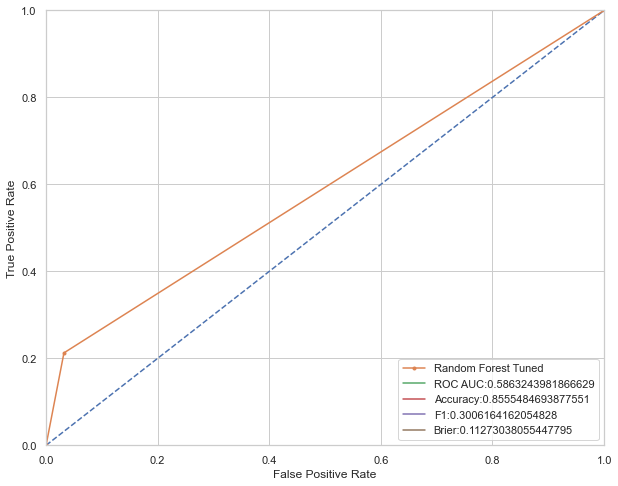

In [131]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest Tuned')
plt.plot(0, label = 'ROC AUC:'+str(rf_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(rf_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(rf_tuned_f1))
plt.plot(0, label = 'Brier:'+str(rf_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [132]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    precision = precision_score(y_test, rf_tuned_thresh_predicts)
    recall = recall_score(y_test, rf_tuned_thresh_predicts)
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.168, Completeness = 0.988 | F1 = 0.287
Threshold = 0.01 | Accuracy = 0.189, Completeness = 0.988 | F1 = 0.317
Threshold = 0.02 | Accuracy = 0.196, Completeness = 0.963 | F1 = 0.326
Threshold = 0.03 | Accuracy = 0.199, Completeness = 0.950 | F1 = 0.330
Threshold = 0.04 | Accuracy = 0.204, Completeness = 0.938 | F1 = 0.335
Threshold = 0.05 | Accuracy = 0.205, Completeness = 0.925 | F1 = 0.336
Threshold = 0.06 | Accuracy = 0.211, Completeness = 0.900 | F1 = 0.341
Threshold = 0.07 | Accuracy = 0.216, Completeness = 0.887 | F1 = 0.347
Threshold = 0.08 | Accuracy = 0.228, Completeness = 0.863 | F1 = 0.360
Threshold = 0.09 | Accuracy = 0.234, Completeness = 0.850 | F1 = 0.368
Threshold = 0.10 | Accuracy = 0.246, Completeness = 0.850 | F1 = 0.382
Threshold = 0.11 | Accuracy = 0.259, Completeness = 0.800 | F1 = 0.391
Threshold = 0.12 | Accuracy = 0.269, Completeness = 0.800 | F1 = 0.403
Threshold = 0.13 | Accuracy = 0.276, Completeness = 0.787 | F1 = 0.409
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [133]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.449 and best threshold is: 0.21


In [134]:
def custom_predict(X, threshold):
    
    return (rf_tuned_class1_probs > threshold).astype(int)
    
    
rf_tuned_thresh_predicts = custom_predict(X = x_test, threshold = rf_best_threshold) 

In [135]:
rf_tuned_thresh_cm= confusion_matrix(y_test, rf_tuned_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_thresh_cm)


Random Forest Confusion Matrix:

[[320  86]
 [ 32  48]]


In [136]:
print(classification_report(y_test, rf_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       406
           1       0.36      0.60      0.45        80

    accuracy                           0.76       486
   macro avg       0.63      0.69      0.65       486
weighted avg       0.82      0.76      0.78       486



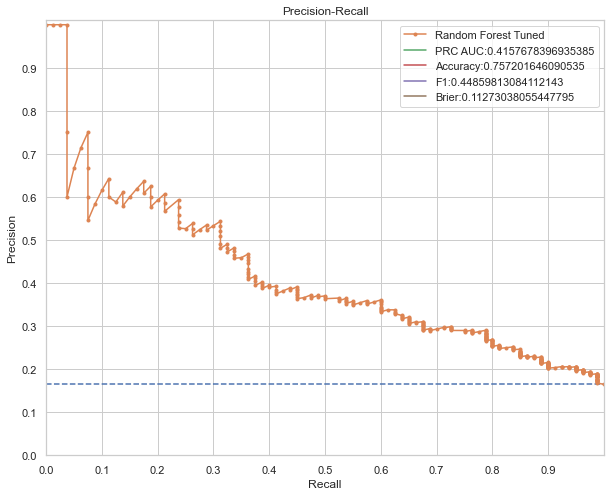

In [137]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_tuned_class1_probs)
rf_tuned_thresh_f1, rf_tuned_prc_auc = f1_score(y_test, rf_tuned_thresh_predicts), auc(recall, precision)
rf_tuned_thresh_accuracy = accuracy_score(y_test, rf_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest Tuned')
plt.plot(0,label='PRC AUC:'+str(rf_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(rf_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(rf_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Bagging

In [138]:
bag = BaggingClassifier().fit(x_train, y_train)

In [139]:
bag_predicts= bag.predict(x_test)

In [140]:
bag_cm= confusion_matrix(y_test, bag_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_cm)


Bagging Classifier Confusion Matrix:

[[394  12]
 [ 57  23]]


In [141]:
print(classification_report(y_test, bag_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       406
           1       0.66      0.29      0.40        80

    accuracy                           0.86       486
   macro avg       0.77      0.63      0.66       486
weighted avg       0.84      0.86      0.83       486



In [142]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_f1)

Bagging doğrulanmış f1 skoru: 0.33985780852678704


In [143]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_accuracy = mean(scor)
print("Bagging doğrulanmış accuracy skoru:", bag_accuracy)

Bagging doğrulanmış accuracy skoru: 0.8531675170068026


In [144]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_brier)

Bagging doğrulanmış brier skoru: 0.11528443877551021


In [145]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", bag_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.6052499040351889


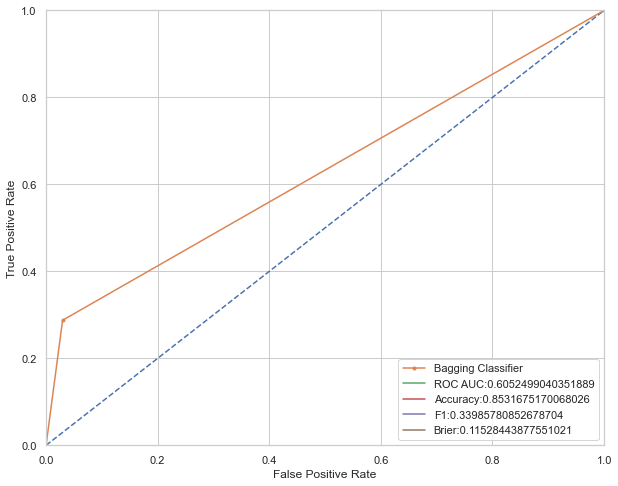

In [146]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier')
plt.plot(0, label = 'ROC AUC:'+str(bag_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(bag_accuracy))
plt.plot(0, label = 'F1:'+str(bag_f1))
plt.plot(0, label = 'Brier:'+str(bag_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [147]:
bag_class1_probs = bag.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    precision = precision_score(y_test, bag_thresh_predicts)
    recall = recall_score(y_test, bag_thresh_predicts)
    f1 = f1_score(y_test, bag_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.01 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.02 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.03 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.04 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.05 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.06 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.07 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.08 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.09 | Accuracy = 0.224, Completeness = 0.950 | F1 = 0.363
Threshold = 0.10 | Accuracy = 0.289, Completeness = 0.787 | F1 = 0.423
Threshold = 0.11 | Accuracy = 0.289, Completeness = 0.787 | F1 = 0.423
Threshold = 0.12 | Accuracy = 0.289, Completeness = 0.787 | F1 = 0.423
Threshold = 0.13 | Accuracy = 0.289, Completeness = 0.787 | F1 = 0.423
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [148]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    f1 = f1_score(y_test, bag_thresh_predicts)
    if f1_list.max() == f1:
        bag_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_best_threshold)

Maximum f1 score is: 0.482 and best threshold is: 0.39


In [149]:
def custom_predict(X, threshold):
     
    return (bag_class1_probs > threshold).astype(int)
    
    
bag_thresh_predicts = custom_predict(X = x_test, threshold = bag_best_threshold) 

In [150]:
bag_thresh_cm= confusion_matrix(y_test, bag_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_thresh_cm)


Bagging Classifier Confusion Matrix:

[[360  46]
 [ 40  40]]


In [151]:
print(classification_report(y_test, bag_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       406
           1       0.47      0.50      0.48        80

    accuracy                           0.82       486
   macro avg       0.68      0.69      0.69       486
weighted avg       0.83      0.82      0.83       486



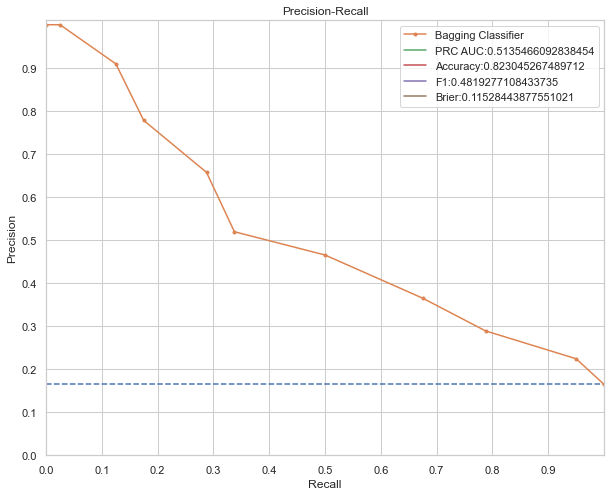

In [152]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_class1_probs)
bag_thresh_f1, bag_prc_auc = f1_score(y_test, bag_thresh_predicts), auc(recall, precision)
bag_thresh_accuracy = accuracy_score(y_test, bag_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_prc_auc))
plt.plot(0,label='Accuracy:'+str(bag_thresh_accuracy))
plt.plot(0,label='F1:'+str(bag_thresh_f1))
plt.plot(0,label='Brier:'+str(bag_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [153]:
bag_params = {
              "max_samples":[1,2,3,5,10,15],
              
            "max_features": [2,5,8, 10],
            "n_estimators": [10,100,250,500,1000]
            }

In [154]:
bag_tuned = GridSearchCV(bag, 
                           bag_params, 
                           cv = cv,
                         scoring='f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [155]:
bag_tuned.fit(x_train, y_train)

Fitting 7 folds for each of 120 candidates, totalling 840 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=3, shuffle=True),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [2, 5, 8, 10],
                         'max_samples': [1, 2, 3, 5, 10, 15],
                         'n_estimators': [10, 100, 250, 500, 1000]},
             scoring='f1', verbose=2)

In [156]:
print("En iyi parametreler: " + str(bag_tuned.best_params_))

En iyi parametreler: {'max_features': 10, 'max_samples': 10, 'n_estimators': 10}


In [157]:
bag_tuned= BaggingClassifier(max_samples=bag_tuned.best_params_["max_samples"],
                                max_features=bag_tuned.best_params_["max_features"],
                                n_estimators=bag_tuned.best_params_["n_estimators"])
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=10, max_samples=10)

In [158]:
bag_tuned_predicts= bag_tuned.predict(x_test)

In [159]:
bag_tuned_cm= confusion_matrix(y_test, bag_tuned_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_cm)


Bagging Classifier Confusion Matrix:

[[406   0]
 [ 80   0]]


In [160]:
print(classification_report(y_test, bag_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       406
           1       0.00      0.00      0.00        80

    accuracy                           0.84       486
   macro avg       0.42      0.50      0.46       486
weighted avg       0.70      0.84      0.76       486



C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
bag_tuned_class1_probs =bag_tuned.predict_proba(x_test)[:, 1]

In [162]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_tuned_f1)

Bagging doğrulanmış f1 skoru: 0.03097563514189779


In [163]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_accuracy = mean(scor)
print("Bagging doğrulanmış accuracy skoru:", bag_tuned_accuracy)

Bagging doğrulanmış accuracy skoru: 0.8372023809523809


In [164]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_tuned_brier)

Bagging doğrulanmış brier skoru: 0.13845779006046863


In [165]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_roc_auc = mean(scor)
print("Bagging doğrulanmış roc-auc skoru:", bag_tuned_roc_auc)

Bagging doğrulanmış roc-auc skoru: 0.5070645999636372


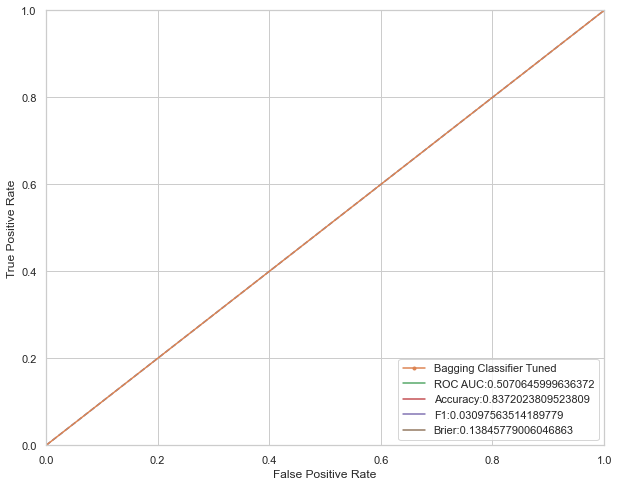

In [166]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier Tuned')
plt.plot(0, label = 'ROC AUC:'+str(bag_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(bag_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(bag_tuned_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [167]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    precision = precision_score(y_test, bag_tuned_thresh_predicts)
    recall = recall_score(y_test, bag_tuned_thresh_predicts)
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.01 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.02 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.03 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.04 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.05 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.06 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.07 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.08 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.09 | Accuracy = 0.176, Completeness = 0.838 | F1 = 0.291
Threshold = 0.10 | Accuracy = 0.218, Completeness = 0.487 | F1 = 0.301
Threshold = 0.11 | Accuracy = 0.218, Completeness = 0.487 | F1 = 0.301
Threshold = 0.12 | Accuracy = 0.218, Completeness = 0.487 | F1 = 0.301
Threshold = 0.13 | Accuracy = 0.218, Completeness = 0.487 | F1 = 0.301
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [168]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    if f1_list.max() == f1:
        bag_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_best_threshold)

Maximum f1 score is: 0.301 and best threshold is: 0.19


In [169]:
def custom_predict(X, threshold):

    return (bag_tuned_class1_probs > threshold).astype(int)
    
    
bag_tuned_thresh_predicts = custom_predict(X = x_test, threshold = bag_best_threshold) 

In [170]:
bag_tuned_thresh_cm= confusion_matrix(y_test, bag_tuned_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_thresh_cm)


Bagging Classifier Confusion Matrix:

[[266 140]
 [ 41  39]]


In [171]:
print(classification_report(y_test, bag_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       406
           1       0.22      0.49      0.30        80

    accuracy                           0.63       486
   macro avg       0.54      0.57      0.52       486
weighted avg       0.76      0.63      0.67       486



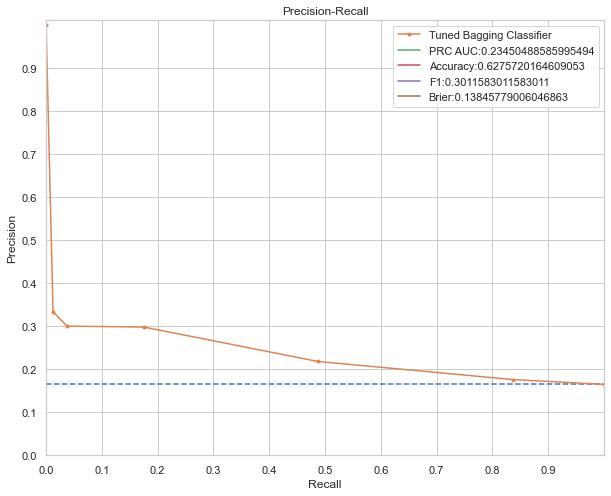

In [172]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_tuned_class1_probs)
bag_tuned_thresh_f1, bag_tuned_prc_auc = f1_score(y_test, bag_tuned_thresh_predicts), auc(recall, precision)
bag_tuned_thresh_accuracy = accuracy_score(y_test, bag_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Tuned Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(bag_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(bag_tuned_thresh_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Gradient Boosting

In [173]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [174]:
gbc_predicts= gbc.predict(x_test)
gbc_cm= confusion_matrix(y_test, gbc_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_cm)


Gradient Boosting Confusion Matrix:

[[395  11]
 [ 60  20]]


In [175]:
print(classification_report(y_test, gbc_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       406
           1       0.65      0.25      0.36        80

    accuracy                           0.85       486
   macro avg       0.76      0.61      0.64       486
weighted avg       0.83      0.85      0.83       486



In [176]:
gbc_class1_probs = gbc.predict_proba(x_test)[:,1]

In [177]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_f1 = mean(scor)
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.3980616618762211


In [178]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_accuracy = mean(scor)
print("Gradient Boosting doğrulanmış accuracy skoru:", gbc_accuracy)

Gradient Boosting doğrulanmış accuracy skoru: 0.858248299319728


In [179]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_brier = -1*mean(scor)
print("Gradient Boosting doğrulanmış brier skoru:", gbc_brier)

Gradient Boosting doğrulanmış brier skoru: 0.09973354201362962


In [180]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_roc_auc = mean(scor)
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.6308661694165338


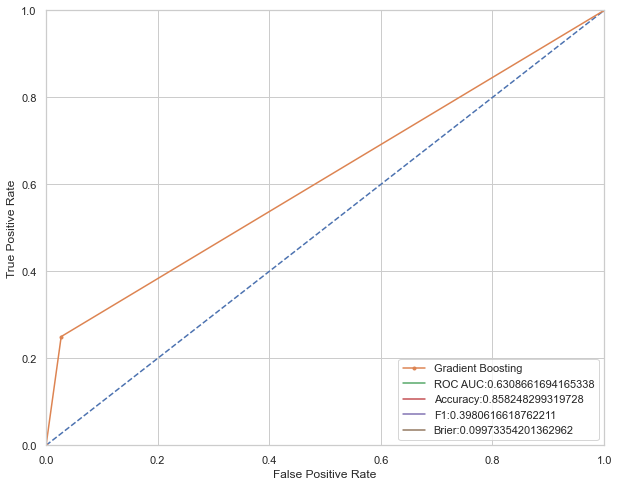

In [181]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
plt.plot(0, label = 'ROC AUC:'+str(gbc_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(gbc_accuracy))
plt.plot(0, label = 'F1:'+str(gbc_f1))
plt.plot(0, label = 'Brier:'+str(gbc_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [182]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    precision = precision_score(y_test, gbc_thresh_predicts)
    recall = recall_score(y_test, gbc_thresh_predicts)
    f1 = f1_score(y_test, gbc_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.168, Completeness = 1.000 | F1 = 0.287
Threshold = 0.02 | Accuracy = 0.181, Completeness = 0.950 | F1 = 0.303
Threshold = 0.03 | Accuracy = 0.204, Completeness = 0.925 | F1 = 0.335
Threshold = 0.04 | Accuracy = 0.230, Completeness = 0.912 | F1 = 0.367
Threshold = 0.05 | Accuracy = 0.239, Completeness = 0.863 | F1 = 0.374
Threshold = 0.06 | Accuracy = 0.256, Completeness = 0.838 | F1 = 0.392
Threshold = 0.07 | Accuracy = 0.278, Completeness = 0.838 | F1 = 0.417
Threshold = 0.08 | Accuracy = 0.300, Completeness = 0.812 | F1 = 0.438
Threshold = 0.09 | Accuracy = 0.317, Completeness = 0.787 | F1 = 0.452
Threshold = 0.10 | Accuracy = 0.335, Completeness = 0.762 | F1 = 0.466
Threshold = 0.11 | Accuracy = 0.353, Completeness = 0.750 | F1 = 0.480
Threshold = 0.12 | Accuracy = 0.366, Completeness = 0.738 | F1 = 0.490
Threshold = 0.13 | Accuracy = 0.388, Completeness = 0.738 | F1 = 0.509
Thresh

In [183]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    f1 = f1_score(y_test, gbc_thresh_predicts)
    if f1_list.max() == f1:
        gbc_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_best_threshold)

Maximum f1 score is: 0.541 and best threshold is: 0.22


In [184]:
def custom_predict(X, threshold):
    
    return (gbc_class1_probs > threshold).astype(int)
    
    
gbc_thresh_predicts = custom_predict(X = x_test, threshold = gbc_best_threshold) 

gbc_thresh_cm= confusion_matrix(y_test, gbc_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_thresh_cm)


Gradient Boosting Confusion Matrix:

[[362  44]
 [ 34  46]]


In [185]:
print(classification_report(y_test, gbc_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       406
           1       0.51      0.57      0.54        80

    accuracy                           0.84       486
   macro avg       0.71      0.73      0.72       486
weighted avg       0.85      0.84      0.84       486



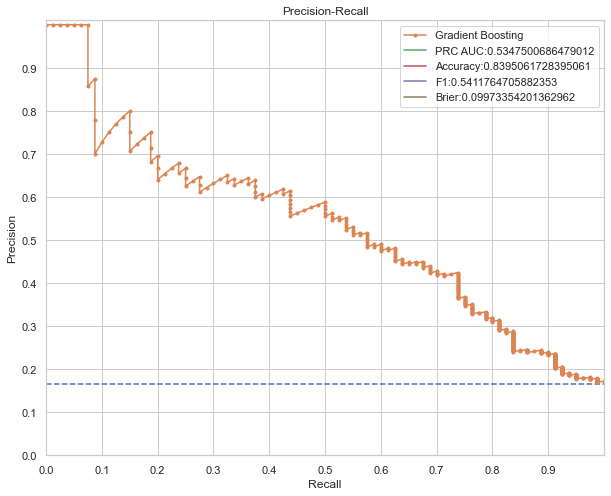

In [186]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_class1_probs)
gbc_thresh_f1, gbc_prc_auc = f1_score(y_test, gbc_thresh_predicts), auc(recall, precision)
gbc_thresh_accuracy = accuracy_score(y_test, gbc_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting')
plt.plot(0,label='PRC AUC:'+str(gbc_prc_auc))
plt.plot(0,label='Accuracy:'+str(gbc_thresh_accuracy))
plt.plot(0,label='F1:'+str(gbc_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [187]:
gbc_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05, 1, 2],
             "n_estimators": [100,500,1000],
              "subsample":[0.1, 0.3, 0.5, 0.7, 0.9],
             "max_depth": [2, 3,5,10, 15],
             "min_samples_split": [2,5, 8,10],
             "criterion":['friedman_mse', 'squared_error', 'mse', 'mae'],
             "loss":['deviance', 'exponential'],
             "min_samples_leaf":[1,2,3,4,5,10],
             "min_impurity_decrease":[0,1,2,3],
             "tol":[0.0001, 0.001, 0.01, 0.1]}

gbc_tuned = RandomizedSearchCV(gbc, 
                           gbc_params, 
                           cv = cv,
                           n_iter = 200,    
                           n_jobs = -1, 
                           verbose = 2,
                              scoring='f1') 

gbc_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(gbc_tuned.best_params_))

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
En iyi parametreler: {'tol': 0.0001, 'subsample': 0.3, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'min_impurity_decrease': 0, 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [188]:
gbc_tuned= GradientBoostingClassifier(learning_rate=gbc_tuned.best_params_["learning_rate"],
                                max_depth=gbc_tuned.best_params_["max_depth"],
                                min_samples_split=gbc_tuned.best_params_["min_samples_split"],
                                n_estimators=gbc_tuned.best_params_["n_estimators"],
                                subsample=gbc_tuned.best_params_["subsample"],
                                criterion=gbc_tuned.best_params_["criterion"],
                                loss=gbc_tuned.best_params_["loss"],
                                min_samples_leaf=gbc_tuned.best_params_["min_samples_leaf"],
                                min_impurity_decrease=gbc_tuned.best_params_["min_impurity_decrease"],
                                tol=gbc_tuned.best_params_["tol"])
gbc_tuned.fit(x_train, y_train)

gbc_tuned_predicts= gbc_tuned.predict(x_test)

gbc_tuned_class1_probs =gbc_tuned.predict_proba(x_test)[:, 1]

In [189]:
gbc_tuned_cm= confusion_matrix(y_test, gbc_tuned_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_cm)


Gradient Boosting Confusion Matrix:

[[390  16]
 [ 51  29]]


In [190]:
print(classification_report(y_test, gbc_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       406
           1       0.64      0.36      0.46        80

    accuracy                           0.86       486
   macro avg       0.76      0.66      0.69       486
weighted avg       0.84      0.86      0.85       486



In [191]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_tuned_f1 = mean(scor)
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_tuned_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.5292231663830419


In [192]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_tuned_accuracy = mean(scor)
print("Gradient Boosting doğrulanmış accuracy skoru:", gbc_tuned_accuracy)

Gradient Boosting doğrulanmış accuracy skoru: 0.8762329931972791


In [193]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_tuned_brier = -1*mean(scor)
print("Gradient Boosting doğrulanmış brier skoru:", gbc_tuned_brier)

Gradient Boosting doğrulanmış brier skoru: 0.09897897513715238


In [194]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(gbc_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
gbc_tuned_roc_auc = mean(scor)
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_tuned_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.7006746771320238


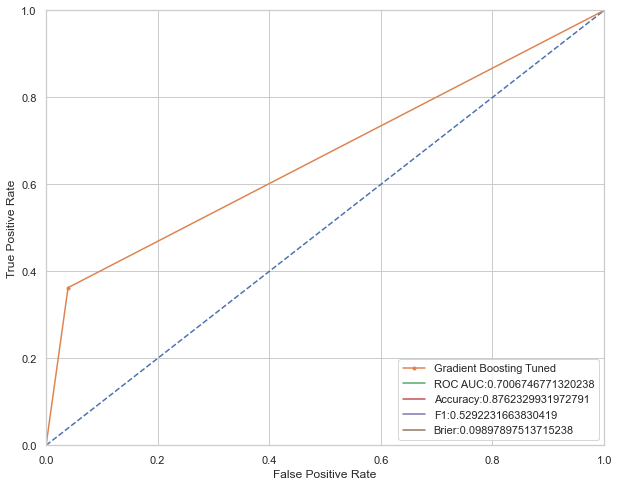

In [195]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting Tuned')
plt.plot(0, label = 'ROC AUC:'+str(gbc_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(gbc_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(gbc_tuned_f1))
plt.plot(0, label = 'Brier:'+str(gbc_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [196]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    precision = precision_score(y_test, gbc_tuned_thresh_predicts)
    recall = recall_score(y_test, gbc_tuned_thresh_predicts)
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.297, Completeness = 0.825 | F1 = 0.437
Threshold = 0.02 | Accuracy = 0.354, Completeness = 0.775 | F1 = 0.486
Threshold = 0.03 | Accuracy = 0.379, Completeness = 0.762 | F1 = 0.506
Threshold = 0.04 | Accuracy = 0.424, Completeness = 0.762 | F1 = 0.545
Threshold = 0.05 | Accuracy = 0.428, Completeness = 0.738 | F1 = 0.541
Threshold = 0.06 | Accuracy = 0.445, Completeness = 0.713 | F1 = 0.548
Threshold = 0.07 | Accuracy = 0.462, Completeness = 0.688 | F1 = 0.553
Threshold = 0.08 | Accuracy = 0.466, Completeness = 0.675 | F1 = 0.551
Threshold = 0.09 | Accuracy = 0.477, Completeness = 0.637 | F1 = 0.545
Threshold = 0.10 | Accuracy = 0.485, Completeness = 0.613 | F1 = 0.541
Threshold = 0.11 | Accuracy = 0.527, Completeness = 0.613 | F1 = 0.566
Threshold = 0.12 | Accuracy = 0.533, Completeness = 0.600 | F1 = 0.565
Threshold = 0.13 | Accuracy = 0.545, Completeness = 0.600 | F1 = 0.571
Thresh

In [197]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    if f1_list.max() == f1:
        gbc_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_best_threshold)

Maximum f1 score is: 0.571 and best threshold is: 0.13


In [198]:
def custom_predict(X, threshold):
    
    return (gbc_tuned_class1_probs > threshold).astype(int)
    
    
gbc_tuned_thresh_predicts = custom_predict(X = x_test, threshold = gbc_best_threshold) 

In [199]:
gbc_tuned_thresh_cm= confusion_matrix(y_test, gbc_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[366  40]
 [ 32  48]]


In [200]:
print(classification_report(y_test, gbc_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       406
           1       0.55      0.60      0.57        80

    accuracy                           0.85       486
   macro avg       0.73      0.75      0.74       486
weighted avg       0.86      0.85      0.85       486



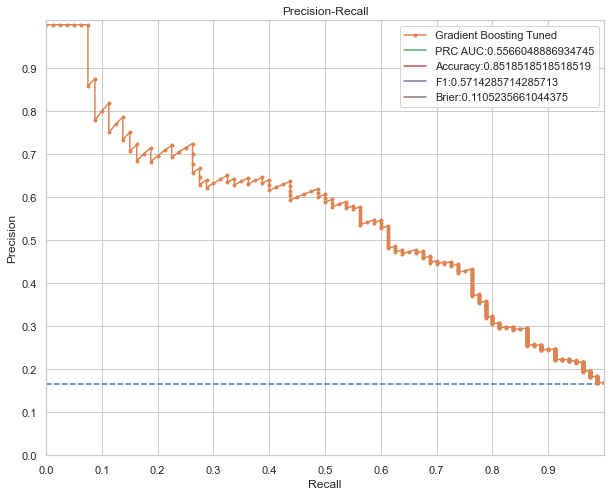

In [201]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_tuned_class1_probs)
gbc_tuned_thresh_f1, gbc_tuned_prc_auc = f1_score(y_test, gbc_tuned_thresh_predicts), auc(recall, precision)
gbc_tuned_thresh_accuracy = accuracy_score(y_test, gbc_tuned_thresh_predicts)
gbc_tuned_brier = brier_score_loss(y_test, gbc_tuned_class1_probs)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting Tuned')
plt.plot(0,label='PRC AUC:'+str(gbc_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(gbc_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(gbc_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Ada Boost

In [202]:
ada= AdaBoostClassifier()
ada.fit(x_train, y_train)

ada_predicts= ada.predict(x_test)
ada_cm= confusion_matrix(y_test, ada_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_cm)


Ada Boost Confusion Matrix:

[[395  11]
 [ 54  26]]


In [203]:
print(classification_report(y_test, ada_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       406
           1       0.70      0.33      0.44        80

    accuracy                           0.87       486
   macro avg       0.79      0.65      0.68       486
weighted avg       0.85      0.87      0.85       486



In [204]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_f1 = mean(scor)
print("Ada Boost doğrulanmış f1 skoru:", ada_f1)

Ada Boost doğrulanmış f1 skoru: 0.5125255347226532


In [205]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_accuracy = mean(scor)
print("Ada Boost doğrulanmış accuracy skoru:", ada_accuracy)

Ada Boost doğrulanmış accuracy skoru: 0.8755102040816328


In [206]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_brier = -1*mean(scor)
print("Ada Boost doğrulanmış brier skoru:", ada_brier)

Ada Boost doğrulanmış brier skoru: 0.23449196072883535


In [207]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_roc_auc = mean(scor)
print("Ada Boost doğrulanmış roc-auc skoru:", ada_roc_auc)

Ada Boost doğrulanmış roc-auc skoru: 0.6902386725106069


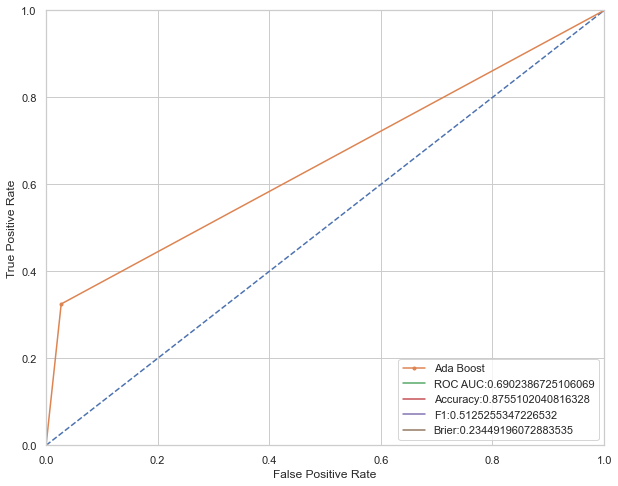

In [208]:
ada_class1_probs = ada.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost')
plt.plot(0, label = 'ROC AUC:'+str(ada_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(ada_accuracy))
plt.plot(0, label = 'F1:'+str(ada_f1))
plt.plot(0, label = 'Brier:'+str(ada_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [209]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    precision = precision_score(y_test, ada_thresh_predicts)
    recall = recall_score(y_test, ada_thresh_predicts)
    f1 = f1_score(y_test, ada_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.02 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.03 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.04 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.05 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.06 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.07 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.08 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.09 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.10 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.11 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.12 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.13 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [210]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    f1 = f1_score(y_test, ada_thresh_predicts)
    if f1_list.max() == f1:
        ada_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_best_threshold)

Maximum f1 score is: 0.502 and best threshold is: 0.49


In [211]:
def custom_predict(X, threshold):
    
    return (ada_class1_probs > threshold).astype(int)
    
    
ada_thresh_predicts = custom_predict(X = x_test, threshold = ada_best_threshold) 

ada_thresh_cm= confusion_matrix(y_test, ada_thresh_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_thresh_cm)


Ada Boost Confusion Matrix:

[[322  84]
 [ 25  55]]


In [212]:
print(classification_report(y_test, ada_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       406
           1       0.40      0.69      0.50        80

    accuracy                           0.78       486
   macro avg       0.66      0.74      0.68       486
weighted avg       0.84      0.78      0.80       486



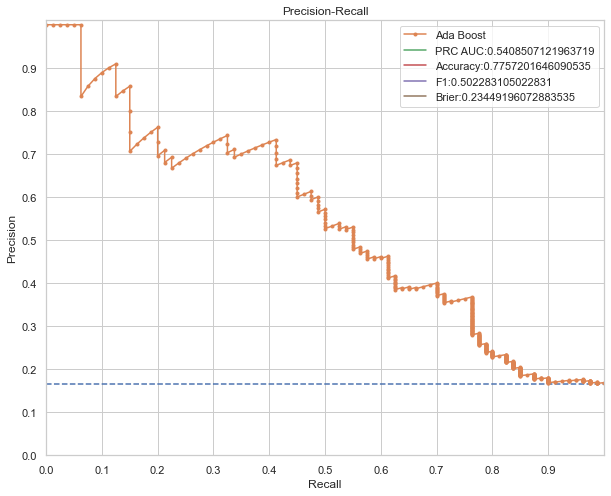

In [213]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_class1_probs)
ada_thresh_f1, ada_prc_auc = f1_score(y_test, ada_thresh_predicts), auc(recall, precision)
ada_thresh_accuracy = accuracy_score(y_test, ada_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost')
plt.plot(0,label='PRC AUC:'+str(ada_prc_auc))
plt.plot(0,label='Accuracy:'+str(ada_thresh_accuracy))
plt.plot(0,label='F1:'+str(ada_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [214]:
ada_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [1, 25, 50,100,250, 500,1000]
             
             }

ada_tuned = GridSearchCV(ada, 
                           ada_params, 
                           cv = cv, 
                           
                               scoring='f1',
                               
                           n_jobs = -1, 
                           verbose = 2) 

ada_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(ada_tuned.best_params_))

ada_tuned= AdaBoostClassifier(learning_rate=ada_tuned.best_params_["learning_rate"],
                                
                                n_estimators=ada_tuned.best_params_["n_estimators"])

ada_tuned.fit(x_train, y_train)

ada_tuned_predicts= ada_tuned.predict(x_test)

ada_tuned_class1_probs =ada_tuned.predict_proba(x_test)[:, 1]

Fitting 7 folds for each of 28 candidates, totalling 196 fits
En iyi parametreler: {'learning_rate': 0.1, 'n_estimators': 1000}


In [215]:
ada_tuned_cm= confusion_matrix(y_test, ada_tuned_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_tuned_cm)

print(classification_report(y_test, ada_tuned_predicts, target_names=target_names))


Ada Boost Confusion Matrix:

[[399   7]
 [ 60  20]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       406
           1       0.74      0.25      0.37        80

    accuracy                           0.86       486
   macro avg       0.81      0.62      0.65       486
weighted avg       0.85      0.86      0.83       486



In [216]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_tuned_f1 = mean(scor)
print("Ada Boost doğrulanmış f1 skoru:", ada_tuned_f1)

Ada Boost doğrulanmış f1 skoru: 0.5176245583071761


In [217]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_tuned_accuracy = mean(scor)
print("Ada Boost doğrulanmış accuracy skoru:", ada_tuned_accuracy)

Ada Boost doğrulanmış accuracy skoru: 0.8816326530612246


In [218]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_tuned_brier = -1*mean(scor)
print("Ada Boost doğrulanmış brier skoru:", ada_tuned_brier)

Ada Boost doğrulanmış brier skoru: 0.24293360656222002


In [219]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(ada_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
ada_tuned_roc_auc = mean(scor)
print("Ada Boost doğrulanmış roc-auc skoru:", ada_tuned_roc_auc)

Ada Boost doğrulanmış roc-auc skoru: 0.6887994026578274


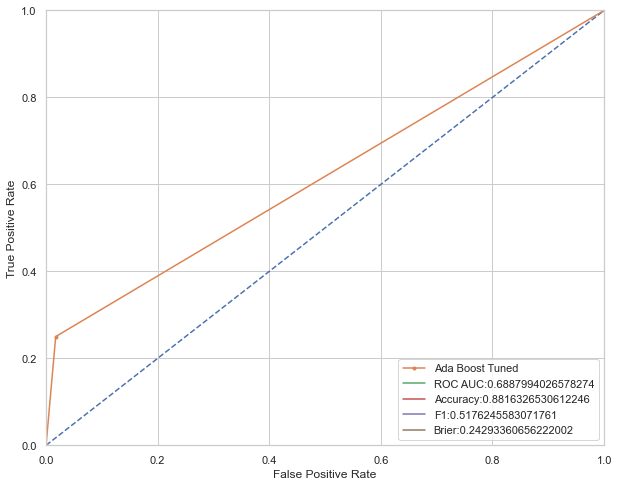

In [220]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost Tuned')
plt.plot(0, label = 'ROC AUC:'+str(ada_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(ada_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(ada_tuned_f1))
plt.plot(0, label = 'Brier:'+str(ada_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [221]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    precision = precision_score(y_test, ada_tuned_thresh_predicts)
    recall = recall_score(y_test, ada_tuned_thresh_predicts)
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.02 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.03 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.04 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.05 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.06 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.07 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.08 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.09 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.10 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.11 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.12 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.13 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [222]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    if f1_list.max() == f1:
        ada_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_best_threshold)

Maximum f1 score is: 0.374 and best threshold is: 0.5


In [223]:
def custom_predict(X, threshold):
    
    return (ada_tuned_class1_probs > threshold).astype(int)
    
    
ada_tuned_thresh_predicts = custom_predict(X = x_test, threshold = ada_best_threshold) 

ada_tuned_thresh_cm= confusion_matrix(y_test, ada_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(ada_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[399   7]
 [ 60  20]]


In [224]:
print(classification_report(y_test, ada_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       406
           1       0.74      0.25      0.37        80

    accuracy                           0.86       486
   macro avg       0.81      0.62      0.65       486
weighted avg       0.85      0.86      0.83       486



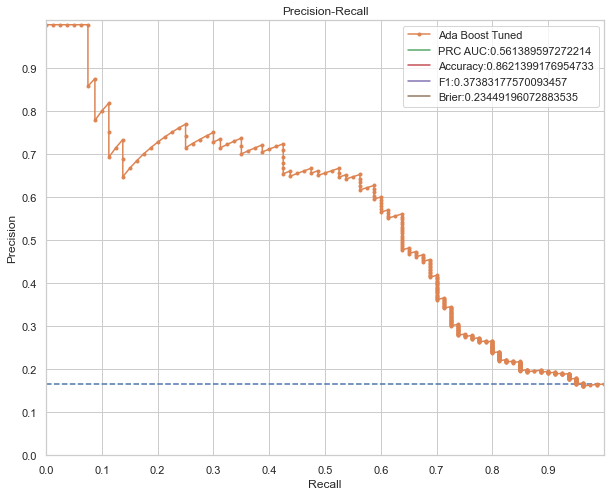

In [225]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_tuned_class1_probs)
ada_tuned_thresh_f1, ada_tuned_prc_auc = f1_score(y_test, ada_tuned_thresh_predicts), auc(recall, precision)
ada_tuned_thresh_accuracy = accuracy_score(y_test, ada_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost Tuned')
plt.plot(0,label='PRC AUC:'+str(ada_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(ada_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(ada_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Decision Tree

In [226]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_predicts= dt.predict(x_test)
dt_cm= confusion_matrix(y_test, dt_predicts)
print("\nDecision Tree Confusion Matrix:\n")
print(dt_cm)


Decision Tree Confusion Matrix:

[[354  52]
 [ 51  29]]


In [227]:
print(classification_report(y_test, dt_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       406
           1       0.36      0.36      0.36        80

    accuracy                           0.79       486
   macro avg       0.62      0.62      0.62       486
weighted avg       0.79      0.79      0.79       486



In [228]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_f1 = mean(scor)
print("Decision Tree doğrulanmış f1 skoru:", dt_f1)

Decision Tree doğrulanmış f1 skoru: 0.3620658765463381


In [229]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_accuracy = mean(scor)
print("Decision Tree doğrulanmış accuracy skoru:", dt_accuracy)

Decision Tree doğrulanmış accuracy skoru: 0.7877763605442176


In [230]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_roc_auc = mean(scor)
print("Decision Tree doğrulanmış roc-auc skoru:", dt_roc_auc)

Decision Tree doğrulanmış roc-auc skoru: 0.6194452146469143


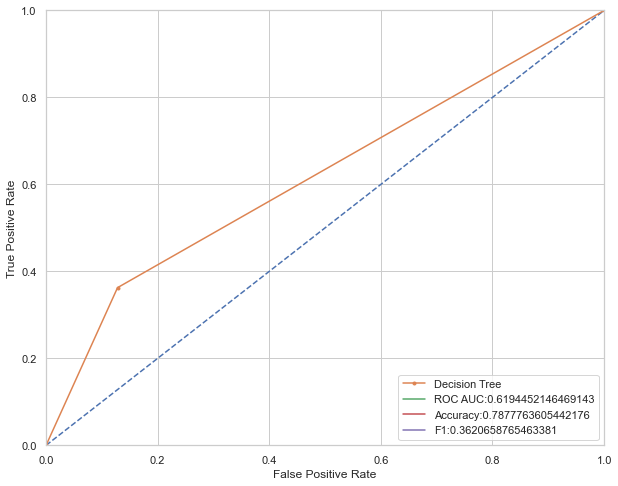

In [231]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, dt_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
plt.plot(0, label = 'ROC AUC:'+str(dt_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(dt_accuracy))
plt.plot(0, label = 'F1:'+str(dt_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

### Hyperparameter Tuning

In [232]:
dt_params = {"criterion" : ["gini", "entropy"],
             "splitter" : ["best", "random"],
             "min_samples_leaf":[1, 3, 5],
             "min_weight_fraction_leaf" : [0, 0.001,  0.1],
             "max_features" : ["auto", "sqrt", "log2"],
             "min_impurity_decrease":[0, 0.01, 0.1],
             "class_weight":['balanced'],
             "ccp_alpha":[0, 0.001, 0.01],
            "max_depth": [1 ,3, 5],
            "min_samples_split" : [2,3,4 ,5 ] }

dt_tuned = RandomizedSearchCV(dt, 
                           dt_params, 
                           cv = cv,
                           n_iter = 200,
                           n_jobs = -1, 
                           verbose = 2) 

dt_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(dt_tuned.best_params_))

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
En iyi parametreler: {'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 3, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_features': 'sqrt', 'max_depth': 1, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.01}


In [233]:
dt_tuned= DecisionTreeClassifier(max_depth=dt_tuned.best_params_["max_depth"],
                                
                                min_samples_split=dt_tuned.best_params_["min_samples_split"],
                                 
                                criterion=dt_tuned.best_params_["criterion"],
                                
                                splitter=dt_tuned.best_params_["splitter"],
                                min_samples_leaf=dt_tuned.best_params_["min_samples_leaf"],
                                
                                min_weight_fraction_leaf=dt_tuned.best_params_["min_weight_fraction_leaf"],
                                max_features=dt_tuned.best_params_["max_features"],
                                
                                min_impurity_decrease=dt_tuned.best_params_["min_impurity_decrease"],
                                class_weight=dt_tuned.best_params_["class_weight"],
                                
                                ccp_alpha=dt_tuned.best_params_["ccp_alpha"],
                                )

dt_tuned.fit(x_train, y_train)

dt_tuned_predicts= dt_tuned.predict(x_test)

In [234]:
dt_tuned_cm= confusion_matrix(y_test, dt_tuned_predicts)
print("\nDecision Tree Confusion Matrix:\n")
print(dt_tuned_cm)


Decision Tree Confusion Matrix:

[[307  99]
 [ 38  42]]


In [235]:
print(classification_report(y_test, dt_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       406
           1       0.30      0.53      0.38        80

    accuracy                           0.72       486
   macro avg       0.59      0.64      0.60       486
weighted avg       0.79      0.72      0.75       486



In [236]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_tuned_f1 = mean(scor)
print("Decision Tree doğrulanmış f1 skoru:", dt_tuned_f1)

Decision Tree doğrulanmış f1 skoru: 0.22909622704566054


In [237]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_tuned_accuracy = mean(scor)
print("Decision Tree doğrulanmış accuracy skoru:", dt_tuned_accuracy)

Decision Tree doğrulanmış accuracy skoru: 0.6656887755102041


In [238]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(dt_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
dt_tuned_roc_auc = mean(scor)
print("Decision Tree doğrulanmış roc-auc skoru:", dt_tuned_roc_auc)

Decision Tree doğrulanmış roc-auc skoru: 0.5700958120632691


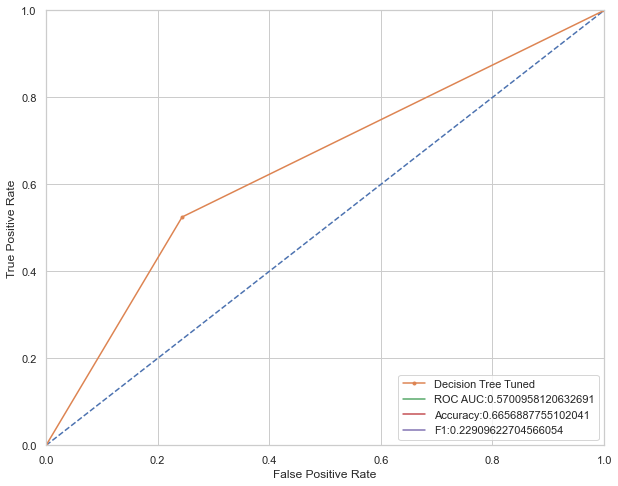

In [239]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, dt_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Decision Tree Tuned')
plt.plot(0, label = 'ROC AUC:'+str(dt_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(dt_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(dt_tuned_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

## Extra Trees

In [240]:
et= ExtraTreesClassifier()
et.fit(x_train, y_train)

et_predicts= et.predict(x_test)
et_cm= confusion_matrix(y_test, et_predicts)
print("\nExtra Trees Classifier Confusion Matrix:\n")
print(et_cm)


Extra Trees Classifier Confusion Matrix:

[[402   4]
 [ 68  12]]


In [241]:
print(classification_report(y_test, et_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       406
           1       0.75      0.15      0.25        80

    accuracy                           0.85       486
   macro avg       0.80      0.57      0.58       486
weighted avg       0.84      0.85      0.81       486



In [242]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_f1 = mean(scor)
print("Extra Tree doğrulanmış f1 skoru:", et_f1)

Extra Tree doğrulanmış f1 skoru: 0.29453073035568655


In [243]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_accuracy = mean(scor)
print("Extra Tree doğrulanmış accuracy skoru:", et_accuracy)

Extra Tree doğrulanmış accuracy skoru: 0.8607142857142857


In [244]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_brier = -1*mean(scor)
print("Extra Tree doğrulanmış brier skoru:", et_brier)

Extra Tree doğrulanmış brier skoru: 0.10412810799319729


In [245]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_roc_auc)

Extra Tree doğrulanmış roc-auc skoru: 0.5880648478333937


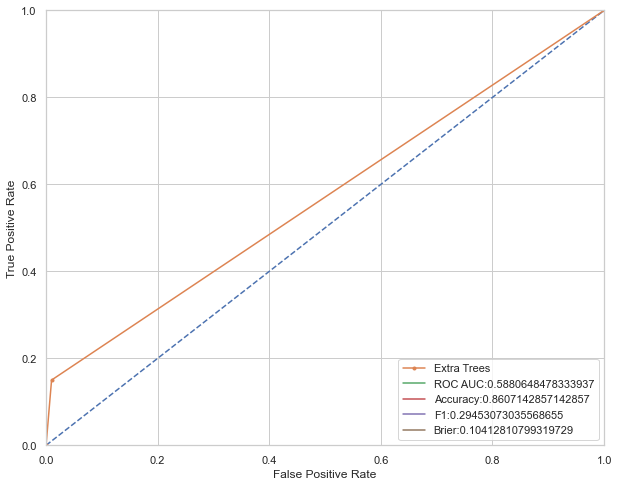

In [246]:
et_class1_probs = et.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees')
plt.plot(0, label = 'ROC AUC:'+str(et_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(et_accuracy))
plt.plot(0, label = 'F1:'+str(et_f1))
plt.plot(0, label = 'Brier:'+str(et_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [247]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    precision = precision_score(y_test, et_thresh_predicts)
    recall = recall_score(y_test, et_thresh_predicts)
    f1 = f1_score(y_test, et_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.166, Completeness = 1.000 | F1 = 0.285
Threshold = 0.01 | Accuracy = 0.171, Completeness = 0.988 | F1 = 0.292
Threshold = 0.02 | Accuracy = 0.177, Completeness = 0.988 | F1 = 0.300
Threshold = 0.03 | Accuracy = 0.181, Completeness = 0.975 | F1 = 0.306
Threshold = 0.04 | Accuracy = 0.186, Completeness = 0.963 | F1 = 0.312
Threshold = 0.05 | Accuracy = 0.199, Completeness = 0.963 | F1 = 0.330
Threshold = 0.06 | Accuracy = 0.211, Completeness = 0.950 | F1 = 0.345
Threshold = 0.07 | Accuracy = 0.226, Completeness = 0.938 | F1 = 0.364
Threshold = 0.08 | Accuracy = 0.230, Completeness = 0.912 | F1 = 0.368
Threshold = 0.09 | Accuracy = 0.245, Completeness = 0.900 | F1 = 0.385
Threshold = 0.10 | Accuracy = 0.251, Completeness = 0.887 | F1 = 0.391
Threshold = 0.11 | Accuracy = 0.261, Completeness = 0.850 | F1 = 0.399
Threshold = 0.12 | Accuracy = 0.272, Completeness = 0.838 | F1 = 0.411
Threshold = 0.13 | Accuracy = 0.291, Completeness = 0.825 | F1 = 0.430
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [248]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    f1 = f1_score(y_test, et_thresh_predicts)
    if f1_list.max() == f1:
        et_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_best_threshold)

def custom_predict(X, threshold):
    
    return (et_class1_probs > threshold).astype(int)
    
    
et_thresh_predicts = custom_predict(X = x_test, threshold = et_best_threshold) 

et_thresh_cm= confusion_matrix(y_test, et_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_thresh_cm)

Maximum f1 score is: 0.517 and best threshold is: 0.33

Extra Trees Confusion Matrix:

[[377  29]
 [ 42  38]]


In [249]:
print(classification_report(y_test, et_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       406
           1       0.57      0.47      0.52        80

    accuracy                           0.85       486
   macro avg       0.73      0.70      0.72       486
weighted avg       0.85      0.85      0.85       486



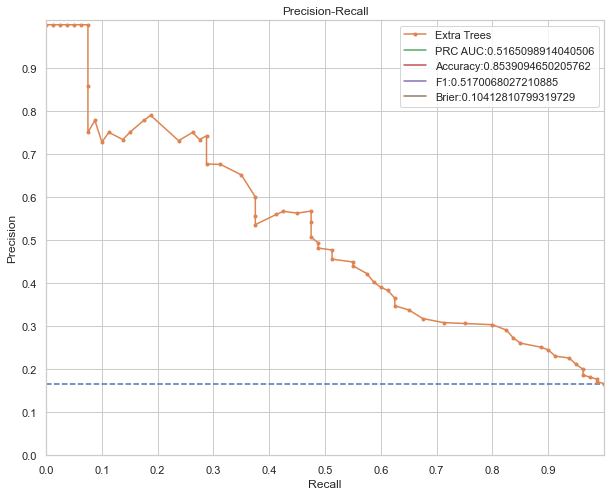

In [250]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_class1_probs)
et_thresh_f1, et_prc_auc = f1_score(y_test, et_thresh_predicts), auc(recall, precision)
et_thresh_accuracy = accuracy_score(y_test, et_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_prc_auc))
plt.plot(0,label='Accuracy:'+str(et_thresh_accuracy))
plt.plot(0,label='F1:'+str(et_thresh_f1))
plt.plot(0,label='Brier:'+str(et_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [251]:
et_params = {"criterion":["gini", "entropy"],
             "min_samples_split" : [2, 3, 4, 5, 6, 7 ,8 ,9, 10],
             "max_features": [2, 3,4, 5,6,7,8,9 ,10,"auto"],
             "n_estimators": [10,25,50,100,250,500,100],
             "class_weight":['balanced_subsample', 'balanced'],
    
    
             
             }

et_tuned = RandomizedSearchCV(et, 
                           et_params, 
                           cv = cv,
                            n_iter = 200,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

et_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(et_tuned.best_params_))

et_tuned= ExtraTreesClassifier(criterion=et_tuned.best_params_["criterion"],
                                
                                min_samples_split=et_tuned.best_params_["min_samples_split"],
                              max_features=et_tuned.best_params_["max_features"],
                               n_estimators=et_tuned.best_params_["n_estimators"],
            
                              class_weight=et_tuned.best_params_["class_weight"])
                              

et_tuned.fit(x_train, y_train)

et_tuned_predicts= et_tuned.predict(x_test)

et_tuned_class1_probs =et_tuned.predict_proba(x_test)[:, 1]

et_tuned_cm= confusion_matrix(y_test, et_tuned_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_cm)

print(classification_report(y_test, et_tuned_predicts, target_names=target_names))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 9, 'max_features': 5, 'criterion': 'gini', 'class_weight': 'balanced'}

Extra Trees Confusion Matrix:

[[385  21]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       406
           1       0.61      0.41      0.49        80

    accuracy                           0.86       486
   macro avg       0.75      0.68      0.71       486
weighted avg       0.85      0.86      0.85       486



In [252]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_f1 = mean(scor)
print("ExtraTree doğrulanmış f1 skoru:", et_tuned_f1)

ExtraTree doğrulanmış f1 skoru: 0.47789760889417593


In [253]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_accuracy = mean(scor)
print("ExtraTree doğrulanmış accuracy skoru:", et_tuned_accuracy)

ExtraTree doğrulanmış accuracy skoru: 0.8610119047619048


In [254]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_brier = -1*mean(scor)
print("ExtraTree doğrulanmış brier skoru:", et_tuned_brier)

ExtraTree doğrulanmış brier skoru: 0.11665527266742741


In [255]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_tuned_roc_auc)

Extra Tree doğrulanmış roc-auc skoru: 0.6770239875611261


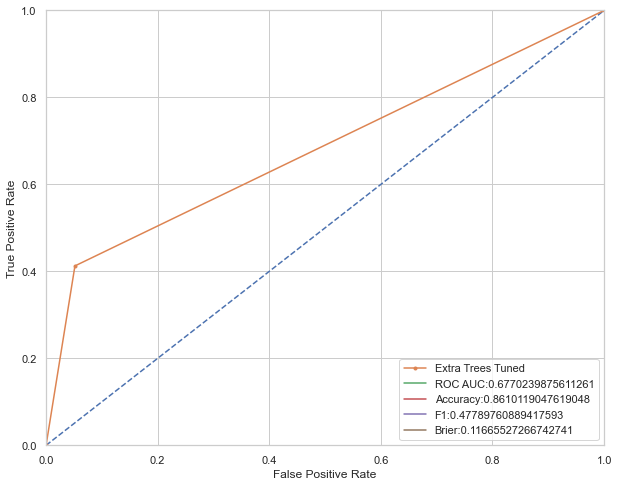

In [256]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees Tuned')
plt.plot(0, label = 'ROC AUC:'+str(et_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(et_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(et_tuned_f1))
plt.plot(0, label = 'Brier:'+str(et_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [302]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    precision = precision_score(y_test, et_tuned_thresh_predicts)
    recall = recall_score(y_test, et_tuned_thresh_predicts)
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.02 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.03 | Accuracy = 0.166, Completeness = 1.000 | F1 = 0.285
Threshold = 0.04 | Accuracy = 0.167, Completeness = 1.000 | F1 = 0.287
Threshold = 0.05 | Accuracy = 0.170, Completeness = 1.000 | F1 = 0.291
Threshold = 0.06 | Accuracy = 0.171, Completeness = 0.988 | F1 = 0.292
Threshold = 0.07 | Accuracy = 0.174, Completeness = 0.988 | F1 = 0.296
Threshold = 0.08 | Accuracy = 0.179, Completeness = 0.988 | F1 = 0.303
Threshold = 0.09 | Accuracy = 0.188, Completeness = 0.988 | F1 = 0.315
Threshold = 0.10 | Accuracy = 0.188, Completeness = 0.975 | F1 = 0.316
Threshold = 0.11 | Accuracy = 0.192, Completeness = 0.963 | F1 = 0.320
Threshold = 0.12 | Accuracy = 0.198, Completeness = 0.963 | F1 = 0.329
Threshold = 0.13 | Accuracy = 0.209, Completeness = 0.963 | F1 = 0.344
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [304]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    if f1_list.max() == f1:
        et_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (et_tuned_class1_probs > threshold).astype(int)
    
    
et_tuned_thresh_predicts = custom_predict(X = x_test, threshold = et_tuned_best_threshold) 

et_tuned_thresh_cm= confusion_matrix(y_test, et_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_thresh_cm)

print(classification_report(y_test, et_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.531 and best threshold is: 0.48

Extra Trees Confusion Matrix:

[[381  25]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       406
           1       0.60      0.47      0.53        80

    accuracy                           0.86       486
   macro avg       0.75      0.71      0.73       486
weighted avg       0.85      0.86      0.86       486



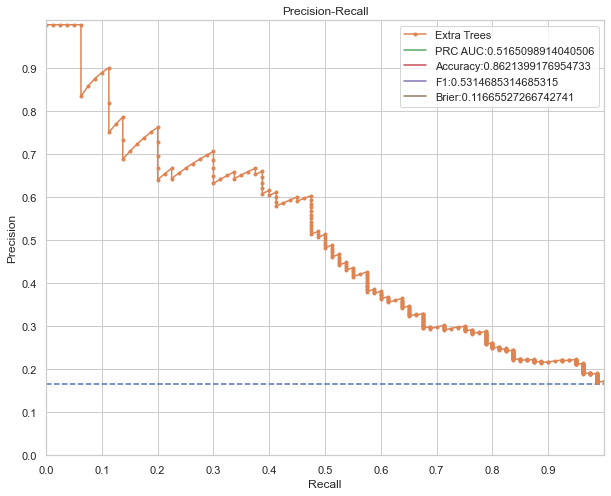

In [305]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_tuned_class1_probs)
et_tuned_thresh_f1, et_tuned_prc_auc = f1_score(y_test, et_tuned_thresh_predicts), auc(recall, precision)
et_tuned_thresh_accuracy = accuracy_score(y_test, et_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_prc_auc))
plt.plot(0,label='Accuracy:'+str(et_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(et_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(et_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Naive Bayes

In [272]:
nb= GaussianNB()
nb.fit(x_train, y_train)

nb_predicts= nb.predict(x_test)
nb_cm= confusion_matrix(y_test, nb_predicts)
print("\nNaive Bayes  Confusion Matrix:\n")
print(nb_cm)

print(classification_report(y_test, nb_predicts, target_names=target_names))


Naive Bayes  Confusion Matrix:

[[305 101]
 [ 32  48]]


In [292]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_f1 = mean(scor)
print("Naive Bayes doğrulanmış f1 skoru:", nb_f1)

Naive Bayes doğrulanmış f1 skoru: 0.48404289159586383


In [290]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_accuracy = mean(scor)
print("Naive Bayes doğrulanmış accuracy skoru:", nb_accuracy)

Naive Bayes doğrulanmış accuracy skoru: 0.7857142857142857


In [276]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_brier = -1*mean(scor)
print("Naive Bayes doğrulanmış brier skoru:", nb_brier)

Naive Bayes doğrulanmış brier skoru: 0.15536376452464268


In [277]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_roc_auc = mean(scor)
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.7219836702015167


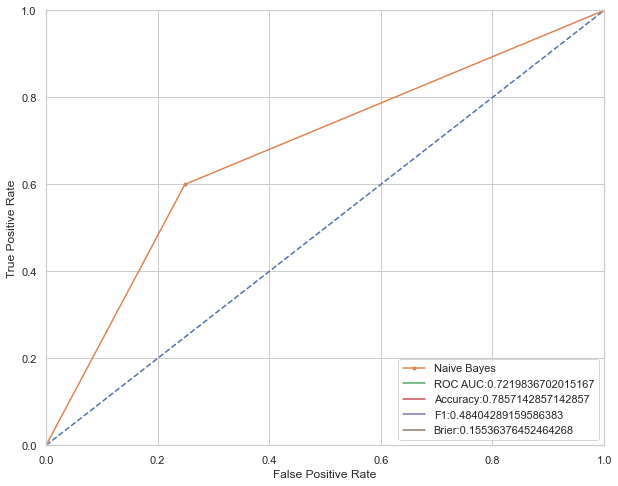

In [279]:
nb_class1_probs = nb.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(nb_accuracy))
plt.plot(0, label = 'F1:'+str(nb_f1))
plt.plot(0, label = 'Brier:'+str(nb_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [281]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    precision = precision_score(y_test, nb_thresh_predicts)
    recall = recall_score(y_test, nb_thresh_predicts)
    f1 = f1_score(y_test, nb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.194, Completeness = 0.787 | F1 = 0.312
Threshold = 0.02 | Accuracy = 0.205, Completeness = 0.775 | F1 = 0.325
Threshold = 0.03 | Accuracy = 0.206, Completeness = 0.750 | F1 = 0.323
Threshold = 0.04 | Accuracy = 0.206, Completeness = 0.738 | F1 = 0.322
Threshold = 0.05 | Accuracy = 0.210, Completeness = 0.738 | F1 = 0.327
Threshold = 0.06 | Accuracy = 0.213, Completeness = 0.725 | F1 = 0.330
Threshold = 0.07 | Accuracy = 0.216, Completeness = 0.725 | F1 = 0.333
Threshold = 0.08 | Accuracy = 0.218, Completeness = 0.725 | F1 = 0.335
Threshold = 0.09 | Accuracy = 0.220, Completeness = 0.725 | F1 = 0.337
Threshold = 0.10 | Accuracy = 0.222, Completeness = 0.725 | F1 = 0.340
Threshold = 0.11 | Accuracy = 0.227, Completeness = 0.725 | F1 = 0.345
Threshold = 0.12 | Accuracy = 0.226, Completeness = 0.713 | F1 = 0.343
Threshold = 0.13 | Accuracy = 0.228, Completeness = 0.700 | F1 = 0.344
Thresh

In [283]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    f1 = f1_score(y_test, nb_thresh_predicts)
    if f1_list.max() == f1:
        nb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_best_threshold)

def custom_predict(X, threshold):
    
    return (nb_class1_probs > threshold).astype(int)
    
    
nb_thresh_predicts = custom_predict(X = x_test, threshold = nb_best_threshold) 

nb_thresh_cm= confusion_matrix(y_test, nb_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(nb_thresh_cm)

print(classification_report(y_test, nb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.455 and best threshold is: 0.88

Extra Trees Confusion Matrix:

[[374  32]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       406
           1       0.51      0.41      0.46        80

    accuracy                           0.84       486
   macro avg       0.70      0.67      0.68       486
weighted avg       0.83      0.84      0.83       486



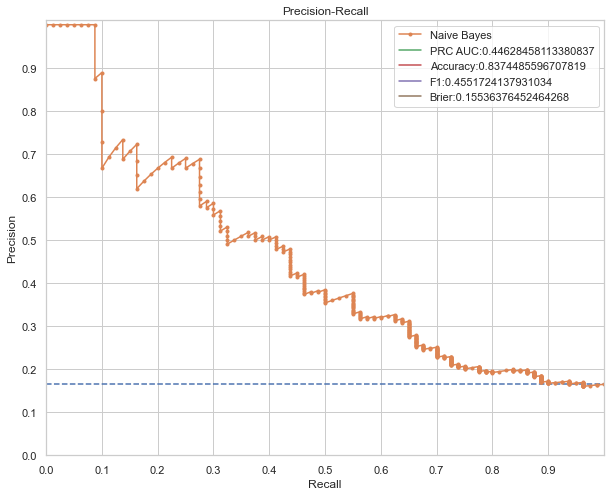

In [294]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_class1_probs)
nb_thresh_f1, nb_prc_auc = f1_score(y_test, nb_thresh_predicts), auc(recall, precision)
nb_thresh_accuracy = accuracy_score(y_test, nb_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_prc_auc))
plt.plot(0,label='Accuracy:'+str(nb_thresh_accuracy))
plt.plot(0,label='F1:'+str(nb_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [296]:
nb_params = {"var_smoothing":[0.0000000001, 0.000000001, 0.00000001, 0.0000001,  0.000001, 0.00001, 0.0001,0.001, 0.01]
    
    
             
             }

nb_tuned = GridSearchCV(nb, 
                           nb_params, 
                           cv = cv,
                            
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

nb_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(nb_tuned.best_params_))

nb_tuned= GaussianNB(var_smoothing=nb_tuned.best_params_["var_smoothing"])
                              

nb_tuned.fit(x_train, y_train)

nb_tuned_predicts= nb_tuned.predict(x_test)

nb_tuned_class1_probs =nb_tuned.predict_proba(x_test)[:, 1]

nb_tuned_cm= confusion_matrix(y_test, nb_tuned_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(nb_tuned_cm)

print(classification_report(y_test, nb_tuned_predicts, target_names=target_names))

Fitting 7 folds for each of 9 candidates, totalling 63 fits
En iyi parametreler: {'var_smoothing': 1e-08}

Naive Bayes Confusion Matrix:

[[339  67]
 [ 35  45]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       406
           1       0.40      0.56      0.47        80

    accuracy                           0.79       486
   macro avg       0.65      0.70      0.67       486
weighted avg       0.82      0.79      0.80       486



In [297]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_f1 = mean(scor)
print("Naive Bayes doğrulanmış accuracy skoru:", nb_tuned_f1)

Naive Bayes doğrulanmış accuracy skoru: 0.49499701585843814


In [298]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_accuracy = mean(scor)
print("Naive Bayes doğrulanmış accuracy skoru:", nb_tuned_accuracy)

Naive Bayes doğrulanmış accuracy skoru: 0.857142857142857


In [299]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_brier = -1*mean(scor)
print("Naive Bayes doğrulanmış brier skoru:", nb_tuned_brier)

Naive Bayes doğrulanmış brier skoru: 0.11887473169479436


In [300]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_roc_auc = mean(scor)
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_tuned_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.6878946493851777


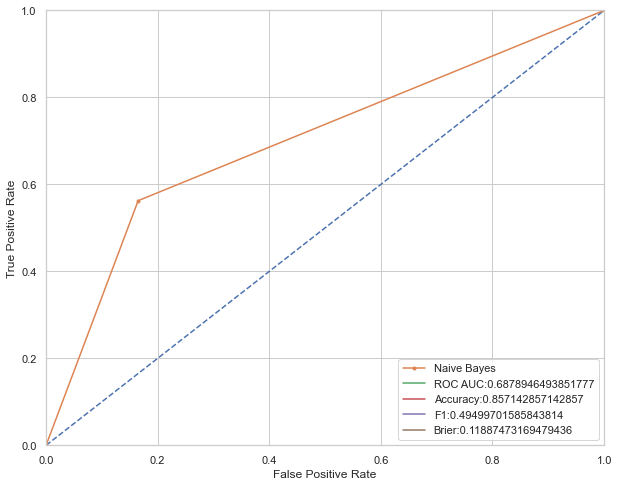

In [301]:
nb_class1_probs = nb.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(nb_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(nb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(nb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [306]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    precision = precision_score(y_test, nb_tuned_thresh_predicts)
    recall = recall_score(y_test, nb_tuned_thresh_predicts)
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.183, Completeness = 0.850 | F1 = 0.301
Threshold = 0.02 | Accuracy = 0.190, Completeness = 0.825 | F1 = 0.308
Threshold = 0.03 | Accuracy = 0.191, Completeness = 0.800 | F1 = 0.308
Threshold = 0.04 | Accuracy = 0.194, Completeness = 0.775 | F1 = 0.311
Threshold = 0.05 | Accuracy = 0.197, Completeness = 0.762 | F1 = 0.314
Threshold = 0.06 | Accuracy = 0.203, Completeness = 0.750 | F1 = 0.319
Threshold = 0.07 | Accuracy = 0.201, Completeness = 0.738 | F1 = 0.316
Threshold = 0.08 | Accuracy = 0.206, Completeness = 0.738 | F1 = 0.322
Threshold = 0.09 | Accuracy = 0.209, Completeness = 0.738 | F1 = 0.326
Threshold = 0.10 | Accuracy = 0.210, Completeness = 0.725 | F1 = 0.326
Threshold = 0.11 | Accuracy = 0.211, Completeness = 0.725 | F1 = 0.327
Threshold = 0.12 | Accuracy = 0.206, Completeness = 0.700 | F1 = 0.318
Threshold = 0.13 | Accuracy = 0.211, Completeness = 0.700 | F1 = 0.325
Thresh

In [307]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        nb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (nb_tuned_class1_probs > threshold).astype(int)
    
    
nb_tuned_thresh_predicts = custom_predict(X = x_test, threshold = nb_tuned_best_threshold) 

nb_tuned_thresh_cm= confusion_matrix(y_test, nb_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(nb_tuned_thresh_cm)

print(classification_report(y_test, nb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.510 and best threshold is: 0.6

Extra Trees Confusion Matrix:

[[378  28]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       406
           1       0.57      0.46      0.51        80

    accuracy                           0.85       486
   macro avg       0.73      0.70      0.71       486
weighted avg       0.84      0.85      0.85       486



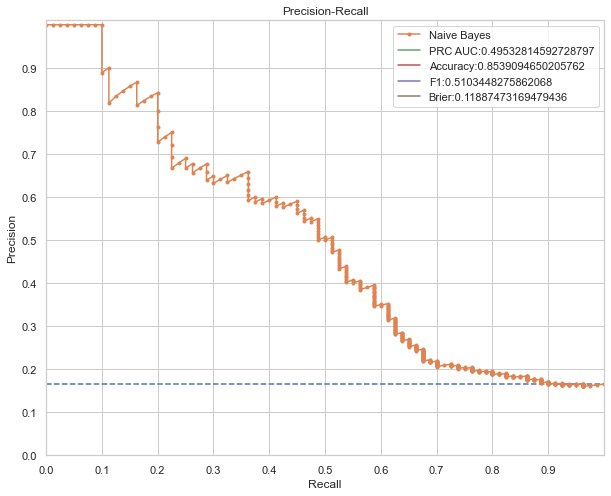

In [308]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_tuned_class1_probs)
nb_tuned_thresh_f1, nb_tuned_prc_auc = f1_score(y_test, nb_tuned_thresh_predicts), auc(recall, precision)
nb_tuned_thresh_accuracy = accuracy_score(y_test, nb_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(nb_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(nb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## KNN

In [311]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_predicts= knn.predict(x_test)
knn_cm= confusion_matrix(y_test, knn_predicts)
print("\nNaive Bayes  Confusion Matrix:\n")
print(knn_cm)

print(classification_report(y_test, knn_predicts, target_names=target_names))


Naive Bayes  Confusion Matrix:

[[384  22]
 [ 74   6]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       406
           1       0.21      0.07      0.11        80

    accuracy                           0.80       486
   macro avg       0.53      0.51      0.50       486
weighted avg       0.74      0.80      0.76       486



In [313]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_f1 = mean(scor)
print("KNN doğrulanmış f1 skoru:", knn_f1)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_accuracy = mean(scor)
print("\nKNN doğrulanmış accuracy skoru:", knn_accuracy)

#---------------------------------
scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_brier = -1*mean(scor)
print("\nKNN doğrulanmış brier skoru:", knn_brier)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_roc_auc = mean(scor)
print("\nKNN doğrulanmış roc-auc skoru:", knn_roc_auc)

KNN doğrulanmış f1 skoru: 0.16399780102690373

KNN doğrulanmış accuracy skoru: 0.8210884353741497

KNN doğrulanmış brier skoru: 0.1485714285714286

KNN doğrulanmış roc-auc skoru: 0.5337863573780822


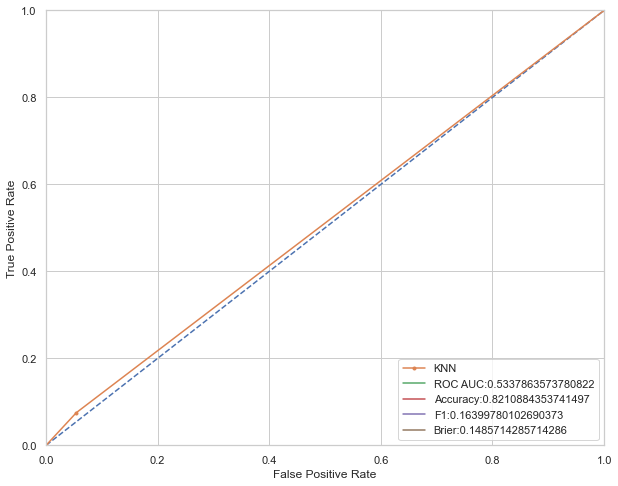

In [316]:
knn_class1_probs = knn.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, knn_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='KNN')
plt.plot(0, label = 'ROC AUC:'+str(knn_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(knn_accuracy))
plt.plot(0, label = 'F1:'+str(knn_f1))
plt.plot(0, label = 'Brier:'+str(knn_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [319]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    knn_thresh_predicts = knn_class1_probs > threshold
    precision = precision_score(y_test, knn_thresh_predicts)
    recall = recall_score(y_test, knn_thresh_predicts)
    f1 = f1_score(y_test, knn_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.01 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.02 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.03 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.04 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.05 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.06 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.07 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.08 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.09 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.10 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.11 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.12 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Threshold = 0.13 | Accuracy = 0.213, Completeness = 0.700 | F1 = 0.327
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [320]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    knn_thresh_predicts = knn_class1_probs > threshold
    f1 = f1_score(y_test, knn_thresh_predicts)
    if f1_list.max() == f1:
        knn_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", knn_best_threshold)

def custom_predict(X, threshold):
    
    return (knn_class1_probs > threshold).astype(int)
    
    
knn_thresh_predicts = custom_predict(X = x_test, threshold = knn_best_threshold) 

knn_thresh_cm= confusion_matrix(y_test, knn_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(knn_thresh_cm)

print(classification_report(y_test, knn_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.327 and best threshold is: 0.19

Extra Trees Confusion Matrix:

[[199 207]
 [ 24  56]]
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       406
           1       0.21      0.70      0.33        80

    accuracy                           0.52       486
   macro avg       0.55      0.60      0.48       486
weighted avg       0.78      0.52      0.58       486



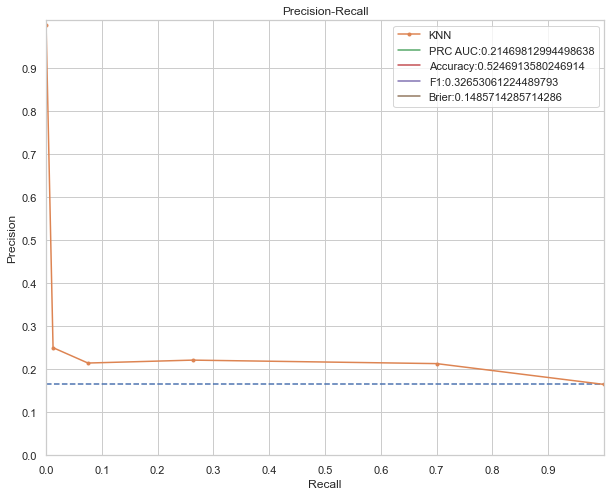

In [322]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, knn_class1_probs)
knn_thresh_f1, knn_prc_auc = f1_score(y_test, knn_thresh_predicts), auc(recall, precision)
knn_thresh_accuracy = accuracy_score(y_test, knn_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='KNN')
plt.plot(0,label='PRC AUC:'+str(knn_prc_auc))
plt.plot(0,label='Accuracy:'+str(knn_thresh_accuracy))
plt.plot(0,label='F1:'+str(knn_thresh_f1))
plt.plot(0,label='Brier:'+str(knn_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [363]:
knn_params = {"n_neighbors": [3, 5, 7,9, 11],
             "weights" : ['uniform', 'distance'],
             "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "leaf_size":[10, 20,30,40,50],
             "p":[1,2]
    
    
             
             }

knn_tuned = GridSearchCV(knn, 
                           knn_params, 
                           cv = cv,
                            
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

knn_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(knn_tuned.best_params_))

knn_tuned= KNeighborsClassifier(n_neighbors=knn_tuned.best_params_["n_neighbors"],
                     weights=knn_tuned.best_params_["weights"],
                     algorithm=knn_tuned.best_params_["algorithm"],
                     leaf_size=knn_tuned.best_params_["leaf_size"],
                     p=knn_tuned.best_params_["p"])
                              

knn_tuned.fit(x_train, y_train)

knn_tuned_predicts= knn_tuned.predict(x_test)

knn_tuned_class1_probs =knn_tuned.predict_proba(x_test)[:, 1]

knn_tuned_cm= confusion_matrix(y_test, knn_tuned_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(knn_tuned_cm)

print(classification_report(y_test, knn_tuned_predicts, target_names=target_names))

Fitting 7 folds for each of 400 candidates, totalling 2800 fits
En iyi parametreler: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

Naive Bayes Confusion Matrix:

[[383  23]
 [ 72   8]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       406
           1       0.26      0.10      0.14        80

    accuracy                           0.80       486
   macro avg       0.55      0.52      0.52       486
weighted avg       0.75      0.80      0.77       486



In [327]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_tuned_f1 = mean(scor)
print("KNN doğrulanmış f1 skoru:", knn_tuned_f1)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_tuned_accuracy = mean(scor)
print("\nKNN doğrulanmış accuracy skoru:", knn_tuned_accuracy)

#---------------------------------
scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_tuned_brier = -1*mean(scor)
print("\nKNN doğrulanmış brier skoru:", knn_tuned_brier)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(knn_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
knn_tuned_roc_auc = mean(scor)
print("\nKNN doğrulanmış roc-auc skoru:", knn_tuned_roc_auc)

KNN doğrulanmış f1 skoru: 0.2037162727754754

KNN doğrulanmış accuracy skoru: 0.8047619047619047

KNN doğrulanmış brier skoru: 0.16379440665154954

KNN doğrulanmış roc-auc skoru: 0.5430185363821954


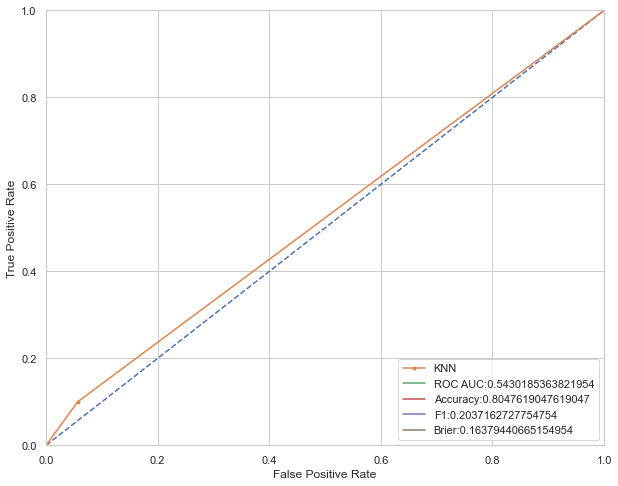

In [328]:
knn_class1_probs = knn.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, knn_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='KNN')
plt.plot(0, label = 'ROC AUC:'+str(knn_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(knn_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(knn_tuned_f1))
plt.plot(0, label = 'Brier:'+str(knn_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [329]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    knn_tuned_thresh_predicts = knn_tuned_class1_probs > threshold
    precision = precision_score(y_test, knn_tuned_thresh_predicts)
    recall = recall_score(y_test, knn_tuned_thresh_predicts)
    f1 = f1_score(y_test, knn_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.01 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.02 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.03 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.04 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.05 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.06 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.07 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.08 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.09 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.10 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.11 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.12 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Threshold = 0.13 | Accuracy = 0.259, Completeness = 0.600 | F1 = 0.362
Thresh

In [330]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    knn_tuned_thresh_predicts = knn_tuned_class1_probs > threshold
    f1 = f1_score(y_test, knn_tuned_thresh_predicts)
    if f1_list.max() == f1:
        knn_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", knn_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (knn_tuned_class1_probs > threshold).astype(int)
    
    
knn_tuned_thresh_predicts = custom_predict(X = x_test, threshold = knn_tuned_best_threshold) 

knn_tuned_thresh_cm= confusion_matrix(y_test, knn_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(knn_tuned_thresh_cm)

print(classification_report(y_test, knn_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.362 and best threshold is: 0.33

Extra Trees Confusion Matrix:

[[269 137]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       406
           1       0.26      0.60      0.36        80

    accuracy                           0.65       486
   macro avg       0.58      0.63      0.56       486
weighted avg       0.79      0.65      0.70       486



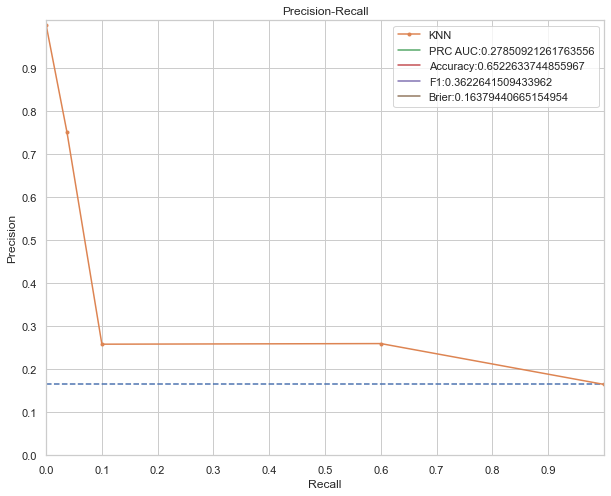

In [332]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, knn_tuned_class1_probs)
knn_tuned_thresh_f1, knn_tuned_prc_auc = f1_score(y_test, knn_tuned_thresh_predicts), auc(recall, precision)
knn_tuned_thresh_accuracy = accuracy_score(y_test, knn_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='KNN')
plt.plot(0,label='PRC AUC:'+str(knn_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(knn_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(knn_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(knn_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## XG Boost

In [107]:
xg= XGBClassifier()
xg.fit(x_train, y_train)

xg_predicts= xg.predict(x_test)
xg_cm= confusion_matrix(y_test, xg_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_cm)

print(classification_report(y_test, xg_predicts, target_names=target_names))


XG Boost Confusion Matrix:

[[400   6]
 [ 60  20]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       406
           1       0.77      0.25      0.38        80

    accuracy                           0.86       486
   macro avg       0.82      0.62      0.65       486
weighted avg       0.85      0.86      0.83       486



In [110]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_f1 = mean(scor)
print("XG Boost doğrulanmış f1 skoru:", xg_f1)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_accuracy = mean(scor)
print("\nXG Boost doğrulanmış accuracy skoru:", xg_accuracy)

#---------------------------------
scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_brier = -1*mean(scor)
print("\nXG Boost doğrulanmış brier skoru:", xg_brier)

#---------------------------------


scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_roc_auc = mean(scor)
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_roc_auc)

XG Boost doğrulanmış f1 skoru: 0.44662869674544364

XG Boost doğrulanmış accuracy skoru: 0.8700680272108844

XG Boost doğrulanmış brier skoru: 0.10646891163699677

XG Boost doğrulanmış roc-auc skoru: 0.6529010101729443


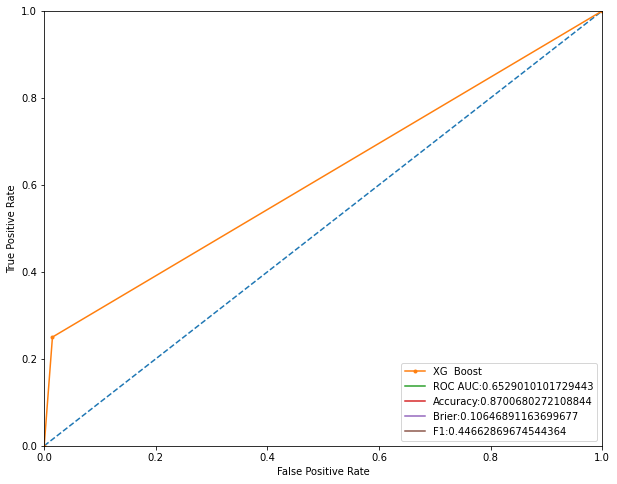

In [111]:
xg_class1_probs = xg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG  Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(xg_accuracy))
plt.plot(0, label = 'Brier:'+str(xg_brier))
plt.plot(0, label = 'F1:'+str(xg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [112]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    precision = precision_score(y_test, xg_thresh_predicts)
    recall = recall_score(y_test, xg_thresh_predicts)
    f1 = f1_score(y_test, xg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.282, Completeness = 0.825 | F1 = 0.420
Threshold = 0.02 | Accuracy = 0.337, Completeness = 0.787 | F1 = 0.472
Threshold = 0.03 | Accuracy = 0.364, Completeness = 0.738 | F1 = 0.488
Threshold = 0.04 | Accuracy = 0.382, Completeness = 0.688 | F1 = 0.491
Threshold = 0.05 | Accuracy = 0.402, Completeness = 0.637 | F1 = 0.493
Threshold = 0.06 | Accuracy = 0.417, Completeness = 0.600 | F1 = 0.492
Threshold = 0.07 | Accuracy = 0.427, Completeness = 0.588 | F1 = 0.495
Threshold = 0.08 | Accuracy = 0.429, Completeness = 0.562 | F1 = 0.486
Threshold = 0.09 | Accuracy = 0.440, Completeness = 0.550 | F1 = 0.489
Threshold = 0.10 | Accuracy = 0.448, Completeness = 0.537 | F1 = 0.489
Threshold = 0.11 | Accuracy = 0.461, Completeness = 0.512 | F1 = 0.485
Threshold = 0.12 | Accuracy = 0.482, Completeness = 0.500 | F1 = 0.491
Threshold = 0.13 | Accuracy = 0.500, Completeness = 0.500 | F1 = 0.500
Thresh

In [114]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    f1 = f1_score(y_test, xg_thresh_predicts)
    if f1_list.max() == f1:
        xg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_best_threshold)

def custom_predict(X, threshold):
    
    return (xg_class1_probs > threshold).astype(int)
    
    
xg_thresh_predicts = custom_predict(X = x_test, threshold = xg_best_threshold) 

xg_thresh_cm= confusion_matrix(y_test, xg_thresh_predicts)
print("\XG Boost Confusion Matrix:\n")
print(xg_thresh_cm)

print(classification_report(y_test, xg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.532 and best threshold is: 0.22
\XG Boost Confusion Matrix:

[[384  22]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       406
           1       0.63      0.46      0.53        80

    accuracy                           0.87       486
   macro avg       0.76      0.70      0.73       486
weighted avg       0.85      0.87      0.86       486



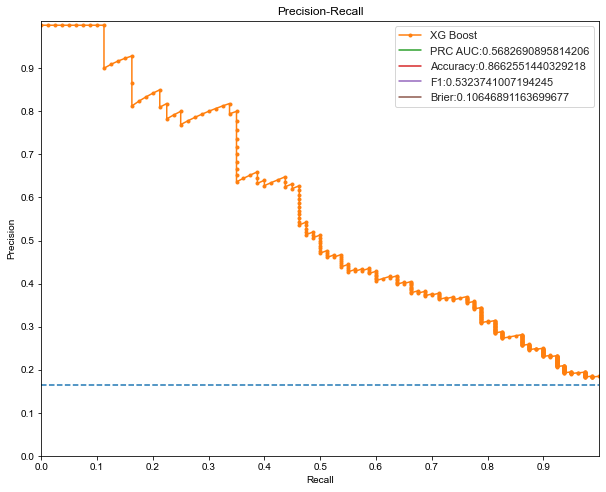

In [115]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_class1_probs)
xg_thresh_f1, xg_prc_auc = f1_score(y_test, xg_thresh_predicts), auc(recall, precision)
xg_thresh_accuracy = accuracy_score(y_test, xg_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_prc_auc))
plt.plot(0,label='Accuracy:'+str(xg_thresh_accuracy))
plt.plot(0,label='F1:'+str(xg_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [127]:


xgboost.set_config(verbosity=0)

xg_params = {
        'n_estimators': [10, 100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6, 10],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10],
        "max_leaves":[0,1,2,3,5,10]}
    
    
             
            

xg_tuned = RandomizedSearchCV(xg, 
                           xg_params, 
                           cv = cv,
                           n_iter=200,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


xg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(xg_tuned.best_params_))

xg_tuned= XGBClassifier(n_estimators=xg_tuned.best_params_["n_estimators"],
                     subsample=xg_tuned.best_params_["subsample"],
                     
                     max_depth=xg_tuned.best_params_["max_depth"],
               learning_rate=xg_tuned.best_params_["learning_rate"],
               min_samples_split=xg_tuned.best_params_["min_samples_split"],
               max_leaves=xg_tuned.best_params_["max_leaves"],
                        eval_metric='mlogloss'
              
                     )
                              

xg_tuned.fit(x_train, y_train)

xg_tuned_predicts= xg_tuned.predict(x_test)

xg_tuned_class1_probs =xg_tuned.predict_proba(x_test)[:, 1]

xg_tuned_cm= confusion_matrix(y_test, xg_tuned_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_cm)

print(classification_report(y_test, xg_tuned_predicts, target_names=target_names))

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
En iyi parametreler: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 5, 'max_leaves': 5, 'max_depth': 3, 'learning_rate': 0.1}

XG Boost Confusion Matrix:

[[400   6]
 [ 56  24]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       406
           1       0.80      0.30      0.44        80

    accuracy                           0.87       486
   macro avg       0.84      0.64      0.68       486
weighted avg       0.86      0.87      0.85       486



In [128]:
scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_tuned_f1 = mean(scor)
print("XG Boost doğrulanmış f1 skoru:", xg_tuned_f1)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg_tuned, x, y, cv=cv, scoring='accuracy'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_tuned_accuracy = mean(scor)
print("\nXG Boost doğrulanmış accuracy skoru:", xg_tuned_accuracy)

#---------------------------------
scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_tuned_brier = -1*mean(scor)
print("\nXG Boost doğrulanmış brier skoru:", xg_tuned_brier)

#---------------------------------

scores = []
for i in range(1,33):
    scores.append(cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
xg_tuned_roc_auc = mean(scor)
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_tuned_roc_auc)

XG Boost doğrulanmış f1 skoru: 0.48616267537142643

XG Boost doğrulanmış accuracy skoru: 0.8761904761904763

XG Boost doğrulanmış brier skoru: 0.0996478566602907

XG Boost doğrulanmış roc-auc skoru: 0.6735012764736095


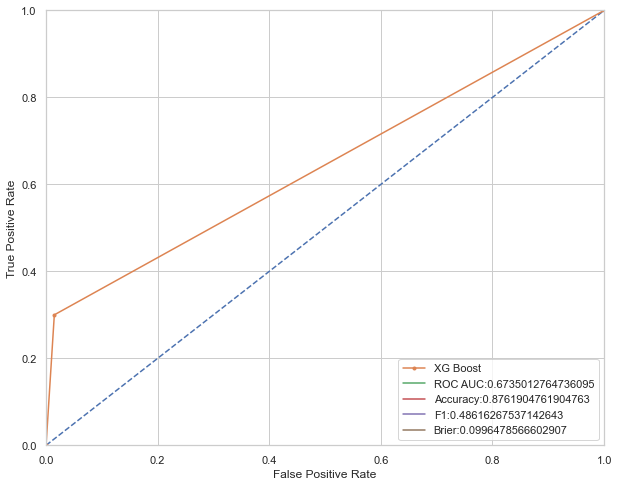

In [129]:
xg_class1_probs = xg.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(xg_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(xg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(xg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [130]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    precision = precision_score(y_test, xg_tuned_thresh_predicts)
    recall = recall_score(y_test, xg_tuned_thresh_predicts)
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.269, Completeness = 0.812 | F1 = 0.404
Threshold = 0.02 | Accuracy = 0.314, Completeness = 0.800 | F1 = 0.451
Threshold = 0.03 | Accuracy = 0.348, Completeness = 0.775 | F1 = 0.481
Threshold = 0.04 | Accuracy = 0.375, Completeness = 0.750 | F1 = 0.500
Threshold = 0.05 | Accuracy = 0.394, Completeness = 0.675 | F1 = 0.498
Threshold = 0.06 | Accuracy = 0.405, Completeness = 0.662 | F1 = 0.502
Threshold = 0.07 | Accuracy = 0.402, Completeness = 0.613 | F1 = 0.485
Threshold = 0.08 | Accuracy = 0.405, Completeness = 0.588 | F1 = 0.480
Threshold = 0.09 | Accuracy = 0.435, Completeness = 0.588 | F1 = 0.500
Threshold = 0.10 | Accuracy = 0.465, Completeness = 0.588 | F1 = 0.519
Threshold = 0.11 | Accuracy = 0.495, Completeness = 0.575 | F1 = 0.532
Threshold = 0.12 | Accuracy = 0.517, Completeness = 0.575 | F1 = 0.544
Threshold = 0.13 | Accuracy = 0.543, Completeness = 0.550 | F1 = 0.547
Thresh

In [131]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        xg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (xg_tuned_class1_probs > threshold).astype(int)
    
    
xg_tuned_thresh_predicts = custom_predict(X = x_test, threshold = xg_tuned_best_threshold) 

xg_tuned_thresh_cm= confusion_matrix(y_test, xg_tuned_thresh_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_thresh_cm)

print(classification_report(y_test, xg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.569 and best threshold is: 0.24

XG Boost Confusion Matrix:

[[393  13]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       406
           1       0.74      0.46      0.57        80

    accuracy                           0.88       486
   macro avg       0.82      0.72      0.75       486
weighted avg       0.87      0.88      0.87       486



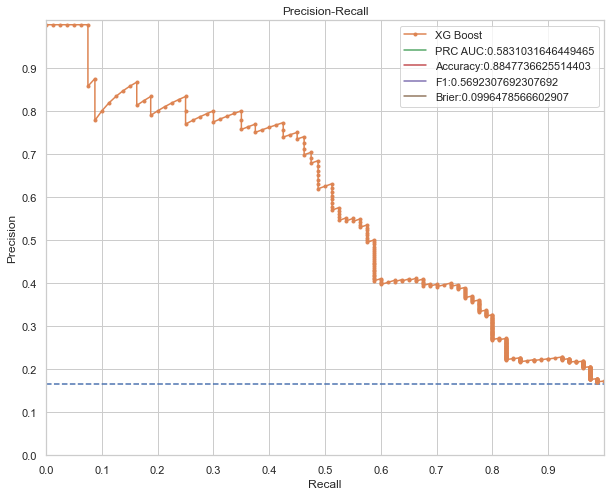

In [132]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_tuned_class1_probs)
xg_tuned_thresh_f1, xg_tuned_prc_auc = f1_score(y_test, xg_tuned_thresh_predicts), auc(recall, precision)
xg_tuned_thresh_accuracy = accuracy_score(y_test, xg_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(xg_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(xg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Cat Boost

In [134]:
cb= CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)

cb_predicts= cb.predict(x_test)
cb_cm= confusion_matrix(y_test, cb_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(cb_cm)

print(classification_report(y_test, cb_predicts, target_names=target_names))


XG Boost Confusion Matrix:

[[400   6]
 [ 62  18]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       406
           1       0.75      0.23      0.35        80

    accuracy                           0.86       486
   macro avg       0.81      0.61      0.63       486
weighted avg       0.85      0.86      0.83       486



In [141]:
cb_f1 = cross_val_score(cb, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_f1)

#---------------------------------


cb_accuracy = cross_val_score(cb, x, y, cv=cv, scoring='accuracy').mean()
print("\nCat Boost doğrulanmış accuracy skoru:", cb_accuracy)

#---------------------------------

cb_brier = -1*cross_val_score(cb, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_brier)

#---------------------------------



cb_roc_auc = cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_roc_auc)

Cat Boost doğrulanmış f1 skoru: 0.39792843452200816

Cat Boost doğrulanmış accuracy skoru: 0.870748299319728

Cat Boost doğrulanmış brier skoru: 0.09493295754828313

Cat Boost doğrulanmış roc-auc skoru: 0.6735012764736095


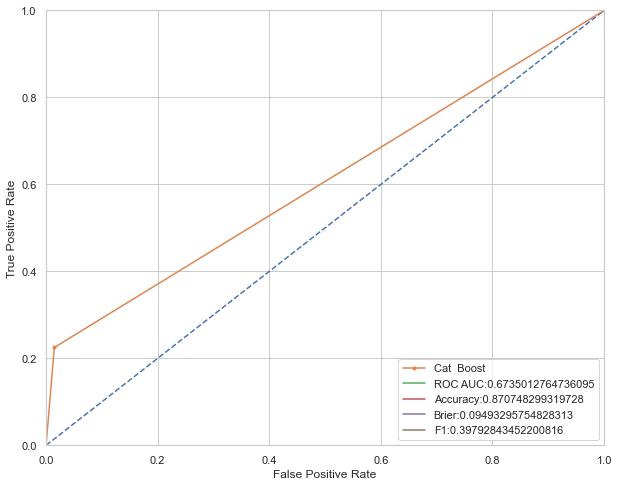

In [142]:
cb_class1_probs = cb.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat  Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(cb_accuracy))
plt.plot(0, label = 'Brier:'+str(cb_brier))
plt.plot(0, label = 'F1:'+str(cb_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [143]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    precision = precision_score(y_test, cb_thresh_predicts)
    recall = recall_score(y_test, cb_thresh_predicts)
    f1 = f1_score(y_test, cb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.170, Completeness = 0.988 | F1 = 0.289
Threshold = 0.02 | Accuracy = 0.197, Completeness = 0.988 | F1 = 0.328
Threshold = 0.03 | Accuracy = 0.213, Completeness = 0.900 | F1 = 0.344
Threshold = 0.04 | Accuracy = 0.233, Completeness = 0.838 | F1 = 0.365
Threshold = 0.05 | Accuracy = 0.257, Completeness = 0.825 | F1 = 0.392
Threshold = 0.06 | Accuracy = 0.283, Completeness = 0.787 | F1 = 0.416
Threshold = 0.07 | Accuracy = 0.312, Completeness = 0.775 | F1 = 0.444
Threshold = 0.08 | Accuracy = 0.323, Completeness = 0.750 | F1 = 0.451
Threshold = 0.09 | Accuracy = 0.339, Completeness = 0.738 | F1 = 0.465
Threshold = 0.10 | Accuracy = 0.365, Completeness = 0.725 | F1 = 0.485
Threshold = 0.11 | Accuracy = 0.408, Completeness = 0.725 | F1 = 0.523
Threshold = 0.12 | Accuracy = 0.424, Completeness = 0.700 | F1 = 0.528
Threshold = 0.13 | Accuracy = 0.444, Completeness = 0.700 | F1 = 0.544
Thresh

In [144]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    f1 = f1_score(y_test, cb_thresh_predicts)
    if f1_list.max() == f1:
        cb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_best_threshold)

def custom_predict(X, threshold):
    
    return (cb_class1_probs > threshold).astype(int)
    
    
cb_thresh_predicts = custom_predict(X = x_test, threshold = cb_best_threshold) 

cb_thresh_cm= confusion_matrix(y_test, cb_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(cb_thresh_cm)

print(classification_report(y_test, cb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.573 and best threshold is: 0.2
\Cat Boost Confusion Matrix:

[[374  32]
 [ 35  45]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       406
           1       0.58      0.56      0.57        80

    accuracy                           0.86       486
   macro avg       0.75      0.74      0.75       486
weighted avg       0.86      0.86      0.86       486



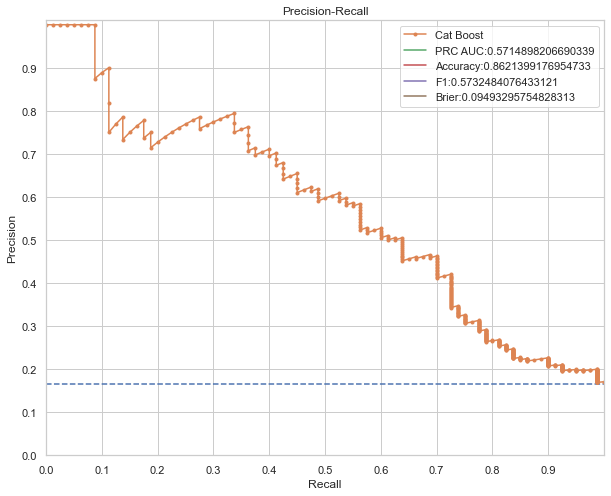

In [145]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_class1_probs)
cb_thresh_f1, cb_prc_auc = f1_score(y_test, cb_thresh_predicts), auc(recall, precision)
cb_thresh_accuracy = accuracy_score(y_test, cb_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_prc_auc))
plt.plot(0,label='Accuracy:'+str(cb_thresh_accuracy))
plt.plot(0,label='F1:'+str(cb_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [150]:


cb_params = {
    
    'learning_rate': [0.01,0.05, 0.1],
    
"max_ctr_complexity":[1,2,3,4,5],
'n_estimators': [10, 100, 500, 1000, 2000],
"score_function" : ["L2", "Cosine"],
'subsample': [0.6, 0.8, 1.0],
'max_depth': [3, 4, 5,6, 10],
"min_child_samples":[2,3,4,5,10]}

    
    
             
            

cb_tuned = RandomizedSearchCV(cb, 
                           cb_params, 
                           cv = cv,
                           n_iter=200,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


cb_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(cb_tuned.best_params_))

cb_tuned= CatBoostClassifier(
                     learning_rate=cb_tuned.best_params_["learning_rate"],
                     
                     max_depth=cb_tuned.best_params_["max_depth"],
               max_ctr_complexity=cb_tuned.best_params_["max_ctr_complexity"],
               score_function=cb_tuned.best_params_["score_function"],
               
                             subsample=cb_tuned.best_params_["subsample"],
                             min_child_samples=cb_tuned.best_params_["min_child_samples"],
    n_estimators=cb_tuned.best_params_["n_estimators"],
                             verbose=False
                        
              
                     )
                              

cb_tuned.fit(x_train, y_train)

cb_tuned_predicts= cb_tuned.predict(x_test)

cb_tuned_class1_probs =cb_tuned.predict_proba(x_test)[:, 1]

cb_tuned_cm= confusion_matrix(y_test, cb_tuned_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_cm)

print(classification_report(y_test, cb_tuned_predicts, target_names=target_names))

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
En iyi parametreler: {'subsample': 0.6, 'score_function': 'Cosine', 'n_estimators': 500, 'min_child_samples': 2, 'max_depth': 3, 'max_ctr_complexity': 3, 'learning_rate': 0.05}

Cat Boost Confusion Matrix:

[[400   6]
 [ 57  23]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       406
           1       0.79      0.29      0.42        80

    accuracy                           0.87       486
   macro avg       0.83      0.64      0.67       486
weighted avg       0.86      0.87      0.84       486



In [175]:
cb_tuned_f1 = cross_val_score(cb_tuned, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_tuned_f1)

#---------------------------------


cb_tuned_accuracy = cross_val_score(cb_tuned, x, y, cv=cv, scoring='accuracy').mean()
print("\nCat Boost doğrulanmış accuracy skoru:", cb_tuned_accuracy)

#---------------------------------

cb_tuned_brier = -1*cross_val_score(cb_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_tuned_brier)

#---------------------------------


cb_tuned_roc_auc = cross_val_score(cb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_tuned_roc_auc)

Cat Boost doğrulanmış f1 skoru: 0.45962314003615623

Cat Boost doğrulanmış accuracy skoru: 0.8748299319727894

Cat Boost doğrulanmış brier skoru: 0.09290007466820302

Cat Boost doğrulanmış roc-auc skoru: 0.6559329047489566


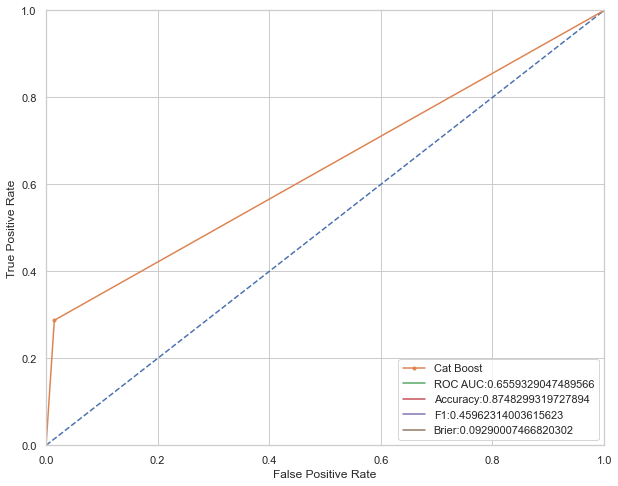

In [154]:
cb_class1_probs = cb.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(cb_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(cb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(cb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [155]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    precision = precision_score(y_test, cb_tuned_thresh_predicts)
    recall = recall_score(y_test, cb_tuned_thresh_predicts)
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.174, Completeness = 0.988 | F1 = 0.295
Threshold = 0.02 | Accuracy = 0.191, Completeness = 0.950 | F1 = 0.319
Threshold = 0.03 | Accuracy = 0.213, Completeness = 0.900 | F1 = 0.344
Threshold = 0.04 | Accuracy = 0.228, Completeness = 0.863 | F1 = 0.361
Threshold = 0.05 | Accuracy = 0.245, Completeness = 0.850 | F1 = 0.380
Threshold = 0.06 | Accuracy = 0.265, Completeness = 0.838 | F1 = 0.402
Threshold = 0.07 | Accuracy = 0.286, Completeness = 0.838 | F1 = 0.427
Threshold = 0.08 | Accuracy = 0.306, Completeness = 0.787 | F1 = 0.441
Threshold = 0.09 | Accuracy = 0.323, Completeness = 0.787 | F1 = 0.458
Threshold = 0.10 | Accuracy = 0.356, Completeness = 0.787 | F1 = 0.490
Threshold = 0.11 | Accuracy = 0.381, Completeness = 0.762 | F1 = 0.508
Threshold = 0.12 | Accuracy = 0.393, Completeness = 0.713 | F1 = 0.507
Threshold = 0.13 | Accuracy = 0.410, Completeness = 0.713 | F1 = 0.521
Thresh

In [156]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        cb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (cb_tuned_class1_probs > threshold).astype(int)
    
    
cb_tuned_thresh_predicts = custom_predict(X = x_test, threshold = cb_tuned_best_threshold) 

cb_tuned_thresh_cm= confusion_matrix(y_test, cb_tuned_thresh_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_thresh_cm)

print(classification_report(y_test, cb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.567 and best threshold is: 0.3

Cat Boost Confusion Matrix:

[[385  21]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       406
           1       0.66      0.50      0.57        80

    accuracy                           0.87       486
   macro avg       0.78      0.72      0.75       486
weighted avg       0.86      0.87      0.87       486



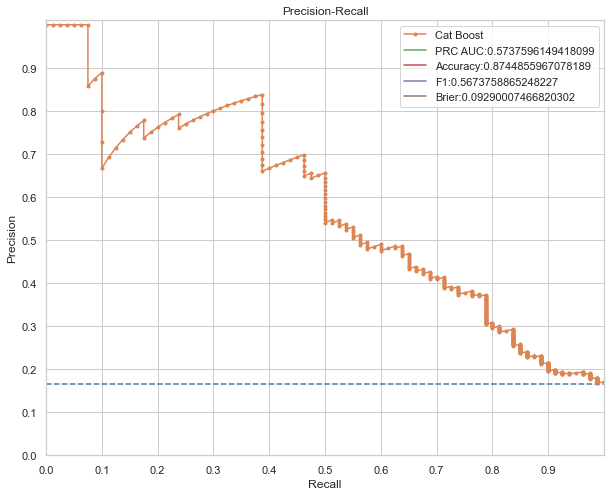

In [158]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_tuned_class1_probs)
cb_tuned_thresh_f1, cb_tuned_prc_auc = f1_score(y_test, cb_tuned_thresh_predicts), auc(recall, precision)
cb_tuned_thresh_accuracy = accuracy_score(y_test, cb_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(cb_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(cb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Light GBM

In [160]:
lg= LGBMClassifier()
lg.fit(x_train, y_train)

lg_predicts= lg.predict(x_test)
lg_cm= confusion_matrix(y_test, lg_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_cm)

print(classification_report(y_test, lg_predicts, target_names=target_names))


Light GBM Confusion Matrix:

[[397   9]
 [ 61  19]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       406
           1       0.68      0.24      0.35        80

    accuracy                           0.86       486
   macro avg       0.77      0.61      0.64       486
weighted avg       0.84      0.86      0.83       486



In [168]:
lg_f1 = cross_val_score(lg, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_f1)

#---------------------------------


lg_accuracy = cross_val_score(lg, x, y, cv=cv, scoring='accuracy').mean()
print("\nLight GBM doğrulanmış accuracy skoru:", lg_accuracy)

#---------------------------------

lg_brier = -1*cross_val_score(lg, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_brier)

#---------------------------------



lg_roc_auc = cross_val_score(lg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_roc_auc)

Cat Boost doğrulanmış f1 skoru: 0.42991741579421927

Cat Boost doğrulanmış accuracy skoru: 0.8673469387755103

Cat Boost doğrulanmış brier skoru: 0.10648644509500307

Cat Boost doğrulanmış roc-auc skoru: 0.6446272653899773


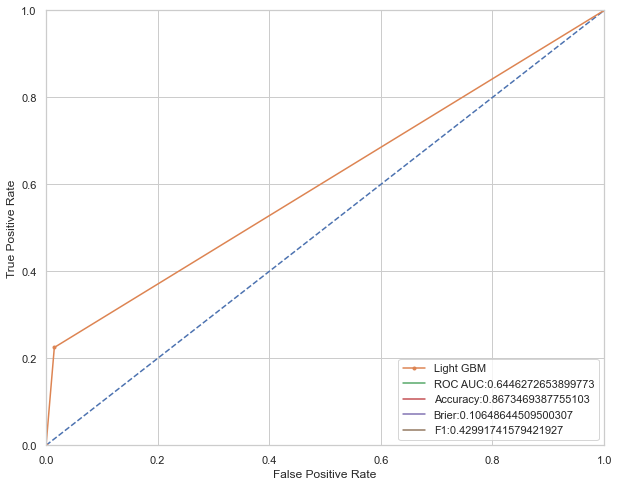

In [174]:
lg_class1_probs = lg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(lg_accuracy))
plt.plot(0, label = 'Brier:'+str(lg_brier))
plt.plot(0, label = 'F1:'+str(lg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [176]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    precision = precision_score(y_test, lg_thresh_predicts)
    recall = recall_score(y_test, lg_thresh_predicts)
    f1 = f1_score(y_test, lg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.304, Completeness = 0.863 | F1 = 0.450
Threshold = 0.02 | Accuracy = 0.356, Completeness = 0.787 | F1 = 0.490
Threshold = 0.03 | Accuracy = 0.381, Completeness = 0.738 | F1 = 0.502
Threshold = 0.04 | Accuracy = 0.414, Completeness = 0.725 | F1 = 0.527
Threshold = 0.05 | Accuracy = 0.455, Completeness = 0.688 | F1 = 0.547
Threshold = 0.06 | Accuracy = 0.486, Completeness = 0.637 | F1 = 0.551
Threshold = 0.07 | Accuracy = 0.510, Completeness = 0.625 | F1 = 0.562
Threshold = 0.08 | Accuracy = 0.522, Completeness = 0.600 | F1 = 0.558
Threshold = 0.09 | Accuracy = 0.533, Completeness = 0.600 | F1 = 0.565
Threshold = 0.10 | Accuracy = 0.547, Completeness = 0.588 | F1 = 0.566
Threshold = 0.11 | Accuracy = 0.531, Completeness = 0.537 | F1 = 0.534
Threshold = 0.12 | Accuracy = 0.532, Completeness = 0.512 | F1 = 0.522
Threshold = 0.13 | Accuracy = 0.533, Completeness = 0.500 | F1 = 0.516
Thresh

In [177]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    f1 = f1_score(y_test, lg_thresh_predicts)
    if f1_list.max() == f1:
        lg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_best_threshold)

def custom_predict(X, threshold):
    
    return (lg_class1_probs > threshold).astype(int)
    
    
lg_thresh_predicts = custom_predict(X = x_test, threshold = lg_best_threshold) 

lg_thresh_cm= confusion_matrix(y_test, lg_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(lg_thresh_cm)

print(classification_report(y_test, lg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.566 and best threshold is: 0.1
\Cat Boost Confusion Matrix:

[[367  39]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       406
           1       0.55      0.59      0.57        80

    accuracy                           0.85       486
   macro avg       0.73      0.75      0.74       486
weighted avg       0.86      0.85      0.85       486



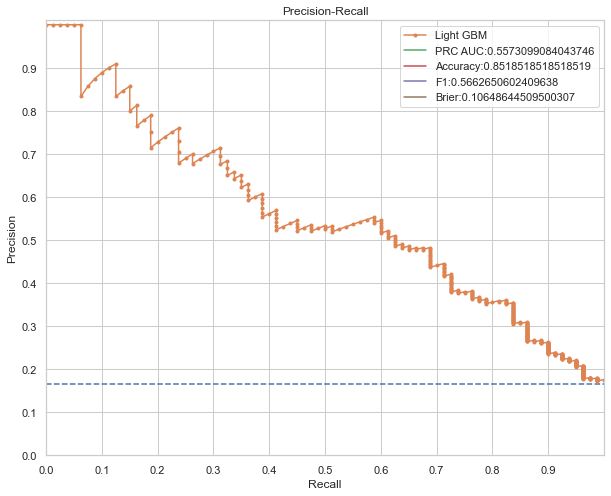

In [180]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_class1_probs)
lg_thresh_f1, lg_prc_auc = f1_score(y_test, lg_thresh_predicts), auc(recall, precision)
lg_thresh_accuracy = accuracy_score(y_test, lg_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_prc_auc))
plt.plot(0,label='Accuracy:'+str(lg_thresh_accuracy))
plt.plot(0,label='F1:'+str(lg_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

### Hyperparameter Tuning

In [195]:
lg_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]
              
              }



    
    
             
            

lg_tuned = RandomizedSearchCV(lg, 
                           lg_params, 
                           cv = cv,
                           n_iter=200,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


lg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(lg_tuned.best_params_))

lg_tuned= LGBMClassifier(
                     
                     
                     n_estimators=lg_tuned.best_params_["n_estimators"],
               subsample=lg_tuned.best_params_["subsample"],
               max_depth=lg_tuned.best_params_["max_depth"],
               
                             learning_rate=lg_tuned.best_params_["learning_rate"],
                             min_child_samples=lg_tuned.best_params_["min_child_samples"]
    
    
                        
              
                     )
                              

lg_tuned.fit(x_train, y_train)

lg_tuned_predicts= lg_tuned.predict(x_test)

lg_tuned_class1_probs =lg_tuned.predict_proba(x_test)[:, 1]

lg_tuned_cm= confusion_matrix(y_test, lg_tuned_predicts)
print("\nlight GBM Confusion Matrix:\n")
print(lg_tuned_cm)

print(classification_report(y_test, lg_tuned_predicts, target_names=target_names))

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
En iyi parametreler: {'subsample': 0.4, 'n_estimators': 2000, 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': 0.1}

light GBM Confusion Matrix:

[[393  13]
 [ 53  27]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       406
           1       0.68      0.34      0.45        80

    accuracy                           0.86       486
   macro avg       0.78      0.65      0.69       486
weighted avg       0.85      0.86      0.84       486



In [196]:
lg_tuned_f1 = cross_val_score(lg_tuned, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_tuned_f1)

#---------------------------------


lg_tuned_accuracy = cross_val_score(lg_tuned, x, y, cv=cv, scoring='accuracy').mean()
print("\nLight GBM doğrulanmış accuracy skoru:", lg_tuned_accuracy)

#---------------------------------

lg_tuned_brier = -1*cross_val_score(lg_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_tuned_brier)

#---------------------------------


lg_tuned_roc_auc = cross_val_score(lg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_tuned_roc_auc)

Light GBM doğrulanmış f1 skoru: 0.4561128818104061

Light GBM doğrulanmış accuracy skoru: 0.8625850340136056

Light GBM doğrulanmış brier skoru: 0.12387814625303295

Light GBM doğrulanmış roc-auc skoru: 0.6606905474054028


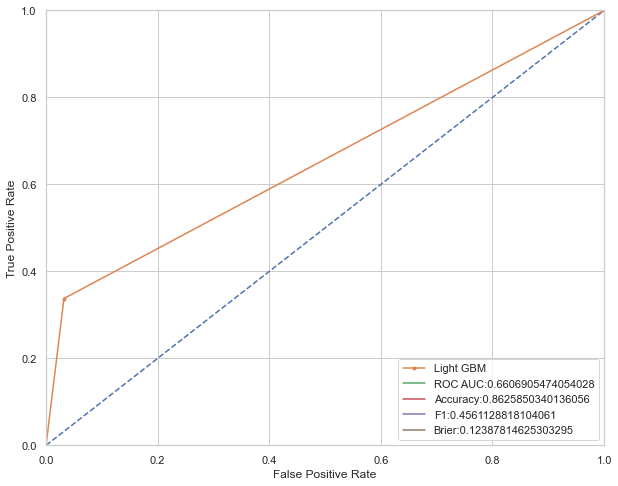

In [197]:
lg_class1_probs = lg.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, lg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_tuned_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(lg_tuned_accuracy))
plt.plot(0, label = 'F1:'+str(lg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(lg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [198]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    precision = precision_score(y_test,lg_tuned_thresh_predicts)
    recall = recall_score(y_test, lg_tuned_thresh_predicts)
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.165, Completeness = 1.000 | F1 = 0.283
Threshold = 0.01 | Accuracy = 0.446, Completeness = 0.512 | F1 = 0.477
Threshold = 0.02 | Accuracy = 0.476, Completeness = 0.500 | F1 = 0.488
Threshold = 0.03 | Accuracy = 0.500, Completeness = 0.500 | F1 = 0.500
Threshold = 0.04 | Accuracy = 0.533, Completeness = 0.500 | F1 = 0.516
Threshold = 0.05 | Accuracy = 0.529, Completeness = 0.463 | F1 = 0.493
Threshold = 0.06 | Accuracy = 0.536, Completeness = 0.463 | F1 = 0.497
Threshold = 0.07 | Accuracy = 0.530, Completeness = 0.438 | F1 = 0.479
Threshold = 0.08 | Accuracy = 0.523, Completeness = 0.425 | F1 = 0.469
Threshold = 0.09 | Accuracy = 0.523, Completeness = 0.425 | F1 = 0.469
Threshold = 0.10 | Accuracy = 0.557, Completeness = 0.425 | F1 = 0.482
Threshold = 0.11 | Accuracy = 0.579, Completeness = 0.412 | F1 = 0.482
Threshold = 0.12 | Accuracy = 0.579, Completeness = 0.412 | F1 = 0.482
Threshold = 0.13 | Accuracy = 0.589, Completeness = 0.412 | F1 = 0.485
Thresh

In [199]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        lg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_tuned_best_threshold)

def custom_predict(X, threshold):
    
    return (lg_tuned_class1_probs > threshold).astype(int)
    
    
lg_tuned_thresh_predicts = custom_predict(X = x_test, threshold = lg_tuned_best_threshold) 

lg_tuned_thresh_cm= confusion_matrix(y_test, lg_tuned_thresh_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_tuned_thresh_cm)

print(classification_report(y_test, lg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.516 and best threshold is: 0.04

Light GBM Confusion Matrix:

[[371  35]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       406
           1       0.53      0.50      0.52        80

    accuracy                           0.85       486
   macro avg       0.72      0.71      0.71       486
weighted avg       0.84      0.85      0.84       486



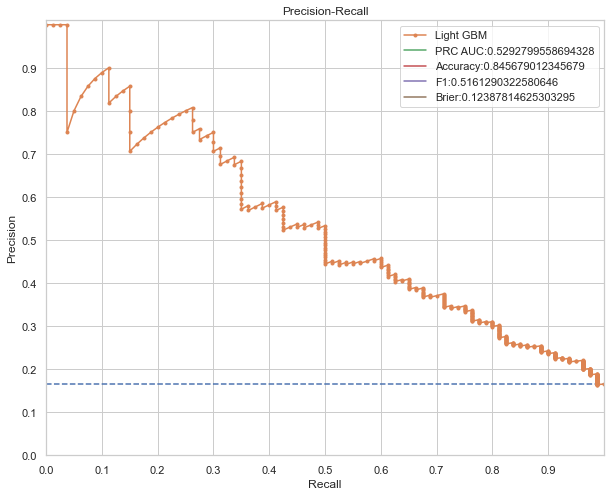

In [200]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_tuned_class1_probs)
lg_tuned_thresh_f1, lg_tuned_prc_auc = f1_score(y_test, lg_tuned_thresh_predicts), auc(recall, precision)
lg_tuned_thresh_accuracy = accuracy_score(y_test, lg_tuned_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_tuned_prc_auc))
plt.plot(0,label='Accuracy:'+str(lg_tuned_thresh_accuracy))
plt.plot(0,label='F1:'+str(lg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()